# **Áâ©‰ª∂ÂÅµÊ∏¨Â∞àÁè≠**

# YOLOv4 ÊâãÊääÊâãË®ìÁ∑¥ÊïôÂ≠∏

## ÂåØÂÖ•ÊâÄÈúÄÂ•ó‰ª∂

In [ ]:
!pip install wandb pycocotools PyYAML==5.4.1 opencv-python==4.4.0.46 imgaug==0.2.5 -q

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1.7 MB 4.0 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 636 kB 44.2 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 49.5 MB 196 kB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 562 kB 37.4 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 144 kB 37.9 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 181 kB 12.4 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 63 kB 1.4 MB/s 


In [1]:
!git clone https://github.com/d246810g2000/PyTorch_YOLOv4.git

Cloning into 'PyTorch_YOLOv4'...
remote: Enumerating objects: 813, done.
remote: Counting objects: 100% (165/165), done.
remote: Compressing objects: 100% (120/120), done.
remote: Total 813 (delta 66), reused 128 (delta 37), pack-reused 648
Receiving objects: 100% (813/813), 32.93 MiB | 29.61 MiB/s, done.
Resolving deltas: 100% (419/419), done.


In [4]:
%cd /content/PyTorch_YOLOv4/

/content/PyTorch_YOLOv4


In [ ]:
import os
import cv2
import math
import yaml
import wandb
import random
import numpy as np
from PIL import Image
from tqdm import tqdm
from pathlib import Path
import matplotlib.pyplot as plt

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler
from utils.torch_utils import ModelEMA

import test
from models.models import *
from utils.general import labels_to_class_weights, fitness, strip_optimizer, check_img_size, bbox_iou
from utils.plots import plot_images, plot_labels, plot_lr_scheduler
from utils.datasets import get_hash, exif_size, load_image, load_mosaic, letterbox, random_perspective, augment_hsv

import warnings 
warnings.filterwarnings("ignore")
%matplotlib inline  

In [ ]:
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## [Ë≤ìÁãóÂÖ¨ÈñãË≥áÊñôÈõÜ](https://public.roboflow.com/object-detection/oxford-pets/2/images/fc82071578629d4d44696cb666898d45)
<img src="https://github.com/d246810g2000/PyTorch_YOLOv4/blob/master/slide_image/data_preview.png?raw=true" width=1080/>

ÈÄôÂÄãË≤ìÁãóÂÖ¨ÈñãË≥áÊñôÈõÜÊèê‰æõ‰∫Ü 3680 ÂºµÂΩ±ÂÉèÔºåÁÇ∫‰∫ÜË®ìÁ∑¥Âø´‰∏ÄÈªûÔºåÈÄôÈÇäÂè™Âèñ‰∫Ü 250 ÂºµÂΩ±ÂÉè‰æÜË®ìÁ∑¥ÔºåÊ™îÊ°àÊîæÂú® datasets/pet.zip ‰∏≠ÔºåÂÖàÁî® convert_voc_to_yolo.py Â∞á PascalVOC ËΩâÊèõÊàê YOLO Ê†ºÂºèÔºö

In [5]:
!unzip -q datasets/datasets.zip -d datasets/
!python convert_voc_to_yolo.py

ËΩâÊèõÂæåÁöÑË≥áÊñôÈõÜÁµêÊßãÂ¶Ç‰∏ãÔºö
- Ë®ìÁ∑¥ÈõÜ: 200 Âºµ
- È©óË≠âÈõÜ: 50 Âºµ

```  
train
‚îÇ
‚îî‚îÄ‚îÄ‚îÄimages (Ë®ìÁ∑¥Áî®ÂΩ±ÂÉè: 200) 
‚îÇ   ‚îÇ   Abyssinian_105.jpg
‚îÇ   ‚îÇ   Abyssinian_169.jpg
‚îÇ   ‚îÇ   ...
‚îÇ
‚îî‚îÄ‚îÄ‚îÄlabels (Ê®ôË®òÊ™îÊ°à: 200)
    ‚îÇ   Abyssinian_105.txt
    ‚îÇ   Abyssinian_169.txt
    ‚îÇ   ...
    
valid
‚îÇ
‚îî‚îÄ‚îÄ‚îÄimages (È©óË≠âÁî®ÂΩ±ÂÉè: 50) 
‚îÇ   ‚îÇ   Abyssinian_170.jpg
‚îÇ   ‚îÇ   Birman_101.jpg
‚îÇ   ‚îÇ   ...
‚îÇ   
‚îî‚îÄ‚îÄ‚îÄlabels (Ê®ôË®òÊ™îÊ°à: 50)
    ‚îÇ   Abyssinian_170.txt
    ‚îÇ   Birman_101.txt
    ‚îÇ   ...
```

ÂâµÂª∫ pet.yaml Ë£°Èù¢ÈúÄË¶ÅË®òÈåÑÔºö
1. train: datasets/pet/train/images # Ë®ìÁ∑¥ÈõÜË∑ØÂæë
2. val: datasets/pet/valid/images # È©óË≠âÈõÜË∑ØÂæë
3. nc: 2 # È°ûÂà•Êï∏Èáè
4. names  [cat, dog] #È°ûÂà•ÂêçÁ®±

In [ ]:
!echo -e 'train: datasets/pet/train/images\nval: datasets/pet/valid/images\n\nnc: 2\nnames: [cat, dog]' > data/pet.yaml
!head data/pet.yaml

train: datasets/pet/train/images
val: datasets/pet/valid/images

nc: 2
names: [cat, dog]


## ‰ΩøÁî® wandb Ë®òÈåÑË®ìÁ∑¥ÈÅéÁ®ã
- ÂÖàÈÄ≤ÂÖ•ÂÆòÁ∂≤ÁôªÂÖ•Ôºöhttps://wandb.ai/site 
- Âè≥‰∏äÊñπÈ†≠ÂÉè -> settings -> Ë§áË£Ω API keys -> Â°´ÂÖ•‰∏ãÊñπËº∏ÂÖ•Ëôï

In [ ]:
# Logging
id = wandb.util.generate_id()
wandb_run = wandb.init(project='YOLOv4', name=id, id=id)

<IPython.core.display.Javascript object>

wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


## ÂèÉÊï∏Ë®≠ÁΩÆ

In [ ]:
# Parameters
project = 'runs/train'
name = id
data = 'data/pet.yaml' 
cfg = 'cfg/yolov4-pet.cfg'
weights = 'yolov4.weights'
hyp = 'data/hyp.scratch.yaml'
img_size = [416, 416]
batch_size = 4
epochs = 300
workers = 8

'''
nbs ÁÇ∫Ê®°Êì¨ÁöÑ batch_size; 
‰æãÂ¶Ç‰∏äÈù¢Ë®≠ÁΩÆÁöÑ batch_size ÁÇ∫ 4, nbs ÁÇ∫ 16
Á≠âÊñºÊ®°ÂûãÊ¢ØÂ∫¶Á¥ØÁ©ç‰∫Ü 16/4=4 (accumulate) Ê¨°‰πãÂæå
ÂÜçÊõ¥Êñ∞‰∏ÄÊ¨°Ê®°ÂûãÔºåËÆäÁõ∏ÁöÑÊì¥Â§ß‰∫Ü batch_size
'''
nbs = 16  # nominal batch size
accumulate = max(round(nbs / batch_size), 1)  # accumulate loss before optimizing

# Hyperparameters
# ËÆÄÂèñ hyp ÂèÉÊï∏
with open(hyp) as f:
    hyp = yaml.load(f, Loader=yaml.FullLoader)  # load hyps

# Ë®≠ÁΩÆ‰øùÂ≠ò results ÁöÑË∑ØÂæë
save_dir = Path(project) / name 
save_dir.mkdir(parents=True, exist_ok=True)  # make dir
results_file = save_dir / 'results.txt'

# ‰øùÂ≠ò hyp ÂèÉÊï∏Âà∞Ëá™Â∑±ÁöÑË∑ØÂæë‰∏ã
with open(save_dir / 'hyp.yaml', 'w') as f:
    yaml.dump(hyp, f, sort_keys=False)

# Ë®≠ÁΩÆË≥áÊñôÈõÜË∑ØÂæë
with open(data) as f:
    data_dict = yaml.load(f, Loader=yaml.FullLoader)  
train_path = data_dict['train']
test_path = data_dict['val']

# Áç≤ÂèñÈ°ûÂà•Êï∏ÈáèÂíåÈ°ûÂà•ÂêçÂ≠ó
nc = int(data_dict['nc'])
names = data_dict['names'] 

# Configure
# ÊòØÂê¶Áπ™Ë£ΩË®ìÁ∑¥„ÄÅÊ∏¨Ë©¶ÂúñÁâá„ÄÅÊåáÊ®ôÂúñÁ≠â
plots = True  

## Ë®ìÁ∑¥Á∏ΩË¶Ω
1. Ë≥áÊñôÂâçËôïÁêÜÔºöËÆÄÂèñÂΩ±ÂÉè„ÄÅË≥áÊñôÂ¢ûÂº∑
2. Âª∫Á´ã YOLOv4 Ê®°ÂûãÔºöCSPDarknet53+SPP+PANet
3. ÊêçÂ§±ÂáΩÊï∏Ë®àÁÆóÔºöÊ≠£Ê®£Êú¨ÂåπÈÖçÁ≠ñÁï•Âíå loss ÂáΩÊï∏ÂÆöÁæ©
4. ÂÑ™ÂåñÂô®ÂÆöÁæ©ÂíåÂ≠∏ÁøíÁéáÁ≠ñÁï•ÔºöCosine annealing scheduler
5. ÈñãÂßãË®ìÁ∑¥ÔºöÂ∞áË®ìÁ∑¥ÈÅéÁ®ãË®òÈåÑÂà∞ wandb Ë£°Èù¢

### 1. Ë≥áÊñôÂâçËôïÁêÜÔºöËÆÄÂèñÂΩ±ÂÉè„ÄÅË≥áÊñôÂ¢ûÂº∑



In [ ]:
img_formats = ['bmp', 'jpg', 'jpeg', 'png', 'tif', 'tiff', 'dng']  # acceptable image suffixes

class LoadImagesAndLabels(torch.utils.data.Dataset):  # for training/testing
    def __init__(self, path, img_size=640, batch_size=16, augment=False, mosaic=False, hyp=None, stride=32, pad=0.0):
        self.img_size = img_size
        self.augment = augment
        self.hyp = hyp
        self.mosaic = mosaic  # load 4 images at a time into a mosaic (only during training)
        self.mosaic_border = [-img_size // 2, -img_size // 2]
        self.stride = stride

        def img2label_paths(img_paths):
            # Define label paths as a function of image paths
            sa, sb = os.sep + 'images' + os.sep, os.sep + 'labels' + os.sep  # /images/, /labels/ substrings
            return [x.replace(sa, sb, 1).replace(x.split('.')[-1], 'txt') for x in img_paths]
        
        # ÂæóÂà∞ path Ë∑ØÂæë‰∏ãÁöÑÊâÄÊúâÂúñÁâáË∑ØÂæë self.img_files
        try:
            f = []  # image files
            for p in path if isinstance(path, list) else [path]:
                p = Path(p)  # os-agnostic
                if p.is_dir():  # dir
                    f += glob.glob(str(p / '**' / '*.*'), recursive=True)
                elif p.is_file():  # file
                    with open(p, 'r') as t:
                        t = t.read().splitlines()
                        parent = str(p.parent) + os.sep
                        f += [x.replace('./', parent) if x.startswith('./') else x for x in t]  # local to global path
                else:
                    raise Exception('%s does not exist' % p)
            self.img_files = sorted([x.replace('/', os.sep) for x in f if x.split('.')[-1].lower() in img_formats])
            assert self.img_files, 'No images found'
        except Exception as e:
            raise Exception('Error loading data from %s: %s' % (path, e))

        # Ê†πÊìö imgs Ë∑ØÂæëÊâæÂà∞ labels ÁöÑË∑ØÂæë: self.label_files
        self.label_files = img2label_paths(self.img_files)  # labels
        # Check cache
        # ‰∏ãÊ¨°ÈÅãË°åÊôÇÁõ¥Êé•Âæû cache ‰∏≠ÂèñÂá∫ labelÔºåÈÄüÂ∫¶ÊúÉÊõ¥Âø´
        cache_path = str(Path(self.label_files[0]).parent) + '.cache3'  # cached labels
        if os.path.isfile(cache_path):
            cache = torch.load(cache_path)  # load
            # Â¶ÇÊûúÊñá‰ª∂ hash ÂÄºÂ∞ç‰∏ç‰∏äÔºåË™™ÊòéË≥áÊñôÈõÜÁöÑÂúñÁâáÂíåÊ®ôÁ±§ÂèØËÉΩÁôºÁîü‰∫ÜËÆäÂåñÔºåÈÇ£Â∞±ÈáçÊñ∞ cache label Êñá‰ª∂
            if cache['hash'] != get_hash(self.label_files + self.img_files):  # dataset changed
                cache = self.cache_labels(cache_path)  # re-cache
        else:
            cache = self.cache_labels(cache_path)  # cache

        # Read cache
        cache.pop('hash')  # remove hash
        labels, shapes = zip(*cache.values())
        self.labels = list(labels)
        self.shapes = np.array(shapes, dtype=np.float64)
        self.img_files = list(cache.keys())  # update
        self.label_files = img2label_paths(cache.keys())  # update

        n = len(shapes)  # number of images
        bi = np.floor(np.arange(n) / batch_size).astype(np.int)  # batch index
        nb = bi[-1] + 1  # number of batches
        self.batch = bi  # batch index of image
        self.n = n
        self.imgs = [None] * n

    def cache_labels(self, path='labels.cache3'):
        # Cache dataset labels, check images and read shapes
        x = {}  # dict
        pbar = tqdm(zip(self.img_files, self.label_files), desc='Scanning images', total=len(self.img_files))
        for (img, label) in pbar:
            try:
                l = []
                im = Image.open(img)
                im.verify()  # PIL verify
                shape = exif_size(im)  # image size
                assert (shape[0] > 9) & (shape[1] > 9), 'image size <10 pixels'
                if os.path.isfile(label):
                    with open(label, 'r') as f:
                        l = np.array([x.split() for x in f.read().splitlines()], dtype=np.float32)  # labels
                if len(l) == 0:
                    l = np.zeros((0, 5), dtype=np.float32)
                x[img] = [l, shape]
            except Exception as e:
                print('WARNING: Ignoring corrupted image and/or label %s: %s' % (img, e))

        x['hash'] = get_hash(self.label_files + self.img_files)
        torch.save(x, path)  # save for next time
        return x

    def __len__(self):
        return len(self.img_files)

    def __getitem__(self, index):
        '''
        Ë®ìÁ∑¥ Ë≥áÊñôÂ¢ûÂº∑: mosaic(random_perspective) + hsv + ‰∏ä‰∏ãÂ∑¶Âè≥ÁøªËΩâ
        Ê∏¨Ë©¶ Ë≥áÊñôÂ¢ûÂº∑: letterbox
        :return torch.from_numpy(img): ÈÄôÂÄã index ÁöÑÂúñÁâáÊï∏Êìö(Â¢ûÂº∑Âæå) [3, 640, 640]
        :return labels_out: ÈÄôÂÄã index ÂúñÁâáÁöÑ gt label [6, 6] = [gt_num, 0+class+xywh(normalized)]
        :return self.img_files[index]: ÈÄôÂÄã index ÂúñÁâáÁöÑË∑ØÂæëÂú∞ÂùÄ
        :return shapes: ÈÄôÂÄã batch ÁöÑÂúñÁâáÁöÑ shapes 
        '''
        hyp = self.hyp # Ë£°Èù¢ÂåÖÂê´Ë®±Â§öË≥áÊñôÂ¢ûÂº∑ÁöÑË∂ÖÂèÉÊï∏
        mosaic = self.mosaic and random.random() < hyp['mosaic']
        if mosaic:
            # Load mosaic
            img, labels = load_mosaic(self, index)
            shapes = None

        else:
            # Load image
            # ËºâÂÖ•ÂúñÁâá‰∏¶ÈÄ≤Ë°å resize Â∞áÁï∂ÂâçÂúñÁâáÁöÑÊúÄÈï∑ÈÇäÁ∏ÆÊîæÂà∞ÊåáÂÆöÁöÑÂ§ßÂ∞è (img_size=640)ÔºåËºÉÂ∞èÈÇäÂêåÊØî‰æãÁ∏ÆÊîæ
            # ÈÄô‰∏ÄÊ≠•ÊòØÂ∞á (350, 480, 3) resize-> (467, 640, 3)
            # img: resize ÂæåÁöÑÂúñÁâá, (h0, w0): ÂéüÂßãÂúñÁâáÁöÑhw, (h, w): resize ÂæåÂúñÁâáÁöÑ hw
            img, (h0, w0), (h, w) = load_image(self, index)

            # Letterbox
            # letterbox ÈÄô‰∏ÄÊ≠•Â∞áÁ¨¨‰∏ÄÊ≠•Á∏ÆÊîæÂæóÂà∞ÁöÑÂúñÁâáÂÜçÁ∏ÆÊîæÂà∞Áï∂Ââç batch ÊâÄÈúÄË¶ÅÁöÑÂ∞∫Â∫¶ 
            # (467, 640, 3) + pad=(0.0, 13.5) -> (480, 640, 3)
            shape = self.img_size  # final letterboxed shape
            img, ratio, pad = letterbox(img, shape, auto=False, scaleup=self.augment)
            shapes = (h0, w0), ((h / h0, w / w0), pad)  # for COCO mAP rescaling

            # Load labels
            # ÂúñÁâá letterbox ‰πãÂæå label ÁöÑÂ∫ßÊ®ô‰πüË¶ÅÁõ∏ÊáâËÆäÂåñÔºåÊ†πÊìö pad Ë™øÊï¥ label Â∫ßÊ®ôÔºå‰∏¶Â∞áÊ≠∏‰∏ÄÂåñÁöÑ xywh -> Êú™Ê≠∏‰∏ÄÂåñÁöÑ xyxy
            labels = []
            x = self.labels[index]
            if x.size > 0:
                # Normalized xywh to pixel xyxy format
                labels = x.copy()
                labels[:, 1] = ratio[0] * w * (x[:, 1] - x[:, 3] / 2) + pad[0]  # pad width
                labels[:, 2] = ratio[1] * h * (x[:, 2] - x[:, 4] / 2) + pad[1]  # pad height
                labels[:, 3] = ratio[0] * w * (x[:, 1] + x[:, 3] / 2) + pad[0]
                labels[:, 4] = ratio[1] * h * (x[:, 2] + x[:, 4] / 2) + pad[1]

        if self.augment:
            # Augment imagespace
            if not mosaic:
                # ‰∏çÂÅö mosaic ÁöÑË©±Â∞±Ë¶ÅÂÅö random_perspective Â¢ûÂº∑ Âõ†ÁÇ∫ mosaic ÂáΩÊï∏ÂÖßÈÉ®Âü∑Ë°å‰∫Ü random_perspective Â¢ûÂº∑
                # random_perspective Â¢ûÂº∑: Èö®Ê©üÂ∞çÂúñÁâáÈÄ≤Ë°åÊóãËΩâ„ÄÅÂπ≥Áßª„ÄÅÁ∏ÆÊîæ„ÄÅË£ÅÂâ™„ÄÅÈÄèË¶ñËÆäÊèõ
                img, labels = random_perspective(img, labels,
                                                 degrees=hyp['degrees'],
                                                 translate=hyp['translate'],
                                                 scale=hyp['scale'],
                                                 shear=hyp['shear'],
                                                 perspective=hyp['perspective'])

            # Augment colorspace
            augment_hsv(img, hgain=hyp['hsv_h'], sgain=hyp['hsv_s'], vgain=hyp['hsv_v'])

        nL = len(labels)  # number of labels
        if nL:
            labels[:, 1:5] = xyxy2xywh(labels[:, 1:5])  # convert xyxy to xywh
            labels[:, [2, 4]] /= img.shape[0]  # normalized height 0-1
            labels[:, [1, 3]] /= img.shape[1]  # normalized width 0-1
            
        # Âπ≥ÁßªÂ¢ûÂº∑ÔºöÈö®Ê©üÂ∑¶Âè≥ÁøªËΩâ + Èö®Ê©ü‰∏ä‰∏ãÁøªËΩâ
        if self.augment:
            # flip up-down
            if random.random() < hyp['flipud']:
                img = np.flipud(img)
                if nL:
                    labels[:, 2] = 1 - labels[:, 2]

            # flip left-right
            if random.random() < hyp['fliplr']:
                img = np.fliplr(img)
                if nL:
                    labels[:, 1] = 1 - labels[:, 1]

        labels_out = torch.zeros((nL, 6))
        if nL:
            labels_out[:, 1:] = torch.from_numpy(labels)

        # Convert
        img = img[:, :, ::-1].transpose(2, 0, 1)  # BGR to RGB, to 3x416x416
        img = np.ascontiguousarray(img)

        return torch.from_numpy(img), labels_out, self.img_files[index], shapes

    @staticmethod
    def collate_fn(batch):
        # ÈÄôÈÇäÂ∞á batch ÁöÑ img Âíå label ÊãºÊé•Ëµ∑‰æÜÔºåËÄåÈÄôË£°‰πãÊâÄ‰ª•ÊãºÊé•ÁöÑÊñπÂºè‰∏çÂêå (stack or cat) 
        # ÊòØÂõ†ÁÇ∫ img ÊãºÊé•ÁöÑÊôÇÂÄôÂÆÉÁöÑÊØèÂÄãÈÉ®ÂàÜÁöÑÂΩ¢ÁãÄÊòØÁõ∏ÂêåÁöÑ
        # ËÄå label ÁöÑÊØèÂÄãÈÉ®ÂàÜÁöÑÂΩ¢ÁãÄ‰∏ç‰∏ÄÂÆöÊòØÁõ∏ÂêåÁöÑÔºåÂõ†ÁÇ∫ÊØèÂºµÂúñÁöÑÁõÆÊ®ôÂÄãÊï∏‰∏ç‰∏ÄÂÆöÁõ∏Âêå
        img, label, path, shapes = zip(*batch)  # transposed
        for i, l in enumerate(label):
            l[:, 0] = i  # add target image index for build_targets()
        return torch.stack(img, 0), torch.cat(label, 0), path, shapes

In [ ]:
def create_dataloader(path, imgsz, batch_size, stride, hyp=None, augment=False, mosaic=False, shuffle=False, pad=0.0, world_size=1, workers=8):
    dataset = LoadImagesAndLabels(path, imgsz, batch_size,
                                  augment=augment,  # augment images
                                  mosaic=mosaic,
                                  hyp=hyp,  # augmentation hyperparameters
                                  stride=int(stride),
                                  pad=pad)

    batch_size = min(batch_size, len(dataset))
    nw = min([os.cpu_count() // world_size, batch_size if batch_size > 1 else 0, workers])  # number of workers
    dataloader = torch.utils.data.DataLoader(dataset, 
                                             batch_size=batch_size, 
                                             shuffle=shuffle,
                                             num_workers=nw,
                                             collate_fn=LoadImagesAndLabels.collate_fn)
    return dataloader, dataset

In [ ]:
# Image sizes
# Áç≤ÂèñÊ®°ÂûãÁ∏ΩÊ≠•Èï∑ÂíåÊ®°ÂûãËº∏ÂÖ•ÂúñÁâáÂàÜËæ®Áéá
gs = 32 # grid size (max stride)
# Ê™¢Êü•Ëº∏ÂÖ•ÂúñÁâáÂàÜËæ®ÁéáÁ¢∫‰øùËÉΩÂ§†Êï¥Èô§Á∏ΩÊ≠•Èï∑gs
imgsz, imgsz_test = [check_img_size(x, gs) for x in img_size]  # verify imgsz are gs-multiples

# Trainloader
dataloader, dataset = create_dataloader(train_path, imgsz, batch_size, gs, hyp=hyp, augment=True, mosaic=True, shuffle=True)
nb = len(dataloader)  # number of batches

# Testloader
testloader = create_dataloader(test_path, imgsz_test, batch_size*2, gs, hyp=hyp, shuffle=False)[0]  # testloader

Scanning images: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:00<00:00, 4451.32it/s]


Áúã‰∏Ä‰∏ãË≥áÊñôÂ¢ûÂº∑ÂæåÁöÑÁµêÊûúÂ¶Ç‰ΩïÔºö

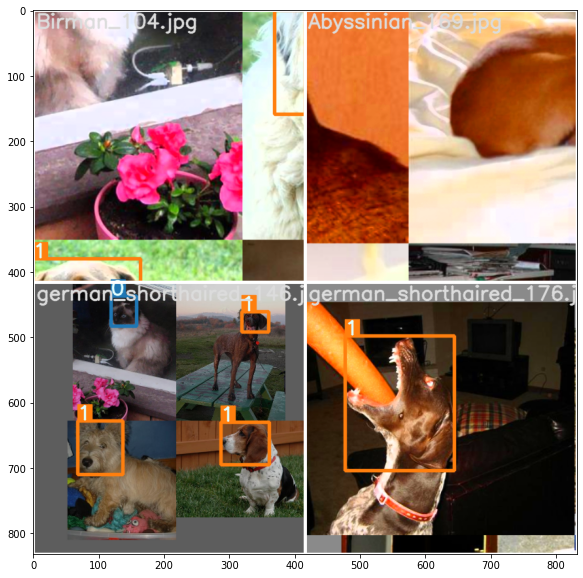

In [ ]:
imgs, labels, paths, _ = next(iter(dataloader))
train_batch = plot_images(images=imgs, targets=labels, paths=paths, fname='train_batch_sample.jpg')
plt.figure(figsize=(10, 10))
plt.imshow(train_batch)

### 2. Âª∫Á´ã YOLOv4 Ê®°ÂûãÔºöCSPDarknet53+SPP+PANet
<img src="https://github.com/d246810g2000/PyTorch_YOLOv4/blob/master/slide_image/yolov4_model.png?raw=true" width=1080/>

ÈúÄÂÖàÊõ¥Êîπ cfg ‰∏≠È°ûÂà•ÂíåÂ∞çÊáâ filter ÁöÑÈÉ®‰ªΩ

In [ ]:
!cp cfg/yolov4.cfg cfg/yolov4-pet.cfg

In [ ]:
!sed -n -e 959p -e 966p -e 1046p -e 1053p -e 1133p -e 1140p cfg/yolov4-pet.cfg

filters=255
classes=80
filters=255
classes=80
filters=255
classes=80


In [ ]:
!sed -i '959s/255/21/' cfg/yolov4-pet.cfg # (classes + 5)x3
!sed -i '966s/80/2/' cfg/yolov4-pet.cfg
!sed -i '1046s/255/21/' cfg/yolov4-pet.cfg # (classes + 5)x3
!sed -i '1053s/80/2/' cfg/yolov4-pet.cfg
!sed -i '1133s/255/21/' cfg/yolov4-pet.cfg # (classes + 5)x3
!sed -i '1140s/80/2/' cfg/yolov4-pet.cfg

In [ ]:
!sed -n -e 959p -e 966p -e 1046p -e 1053p -e 1133p -e 1140p cfg/yolov4-pet.cfg

filters=21
classes=2
filters=21
classes=2
filters=21
classes=2


In [ ]:
# Model
model = Darknet(cfg).to(device) # create

# ‰∏ãËºâÈ†êË®ìÁ∑¥Ê®°Âûã‰∏¶Âä†ËºâÂà∞Ê®°Âûã‰∏≠
# !wget https://github.com/d246810g2000/PyTorch_YOLOv4/releases/download/v1.0/yolov4.weights
# load_darknet_weights(model, weights)

# Model parameters
hyp['cls'] *= nc / 80.  # scale coco-tuned hyp['cls'] to current dataset
model.nc = nc  # attach number of classes to model
model.hyp = hyp  # attach hyperparameters to model
model.gr = 1.0  # iou loss ratio (obj_loss = 1.0 or iou)
model.class_weights = labels_to_class_weights(dataset.labels, nc).to(device)  # attach class weights
model.names = names

In [ ]:
# EMA
ema = ModelEMA(model)

### 3. ÊêçÂ§±ÂáΩÊï∏Ë®àÁÆóÔºöÊ≠£Ê®£Êú¨ÂåπÈÖçÁ≠ñÁï•Âíå loss ÂáΩÊï∏ÂÆöÁæ©

**Ê≠£Ê®£Êú¨ÂåπÈÖçÁ≠ñÁï•ÔºöÂæû label Âª∫ÁΩÆÁ¨¶ÂêàÊ¢ù‰ª∂ÁöÑÊ≠£Ê®£Êú¨ target**

ÈÅ∏ÂèñÊ≠£Ê®£Êú¨Êé°Áî®‰∫ÜË∑®Á∂≤Ê†ºÂåπÈÖçË¶èÂâáÔºåÂ¢ûÂä†Ê≠£Ê®£Êú¨ anchor Êï∏ÈáèÁöÑÂÅöÊ≥ïÔºöÂ∞çÊñº‰ªª‰Ωï‰∏ÄÂÄãËº∏Âá∫Â±§ÔºåÁõ¥Êé•Êé°Áî® shape Ë¶èÂâáÂåπÈÖçÔºå‰πüÂ∞±ÊòØË©≤ bbox ÂíåÁï∂ÂâçÂ±§ÁöÑ anchor Ë®àÁÆóÂØ¨È´òÊØîÔºåÂ¶ÇÊûúÂØ¨È´òÊØî‰æãÂ§ßÊñºË®≠ÂÆöÈñæÂÄºÔºåÂâáË™™ÊòéË©≤ bbox Âíå anchor ÂåπÈÖçÂ∫¶‰∏çÂ§†ÔºåÂ∞áË©≤ bbox ÈÅéÊøæÊö´ÊôÇ‰∏üÊéâÔºåÂú®Ë©≤Â±§È†êÊ∏¨‰∏≠Ë™çÁÇ∫ÊòØËÉåÊôØÔºåÈô§‰∫Ü‰∏≠ÂøÉÁöÑ grid Â§ñÈÇÑÊâæÂá∫ÊúÄËøëÁöÑÂÖ©ÂÄã gridÔºåÂ∞áÈÄô‰∏âÂÄã grid ÈÉΩË™çÁÇ∫ÊòØË≤†Ë≤¨È†êÊ∏¨Ë©≤ bbox ÁöÑ anchor„ÄÇ

<img src="https://github.com/d246810g2000/PyTorch_YOLOv4/blob/master/slide_image/target_grids.png?raw=true" width=720/>

In [ ]:
def build_targets(p, targets, model):
    """
    Build targets for compute_loss()
    :params p: È†êÊ∏¨Ê°Ü Áî±Ê®°ÂûãÊßãÂª∫‰∏≠ÁöÑ‰∏âÂÄã Detector ËøîÂõûÁöÑ‰∏âÂÄã yolo Â±§ÁöÑËº∏Âá∫
               Â¶Ç: [1, 3, 52, 52, 7]„ÄÅ[1, 3, 26, 26, 7]„ÄÅ[1, 3, 13, 13, 7]
               [bs, anchor_num, grid_h, grid_w, xywh+obj+classes]
    :params targets: Êï∏ÊìöÂ¢ûÂº∑ÂæåÁöÑ label [1, 6] [num_target,  image_index+class+xywh] xywh ÁÇ∫Ê≠£Ë¶èÂåñÂæåÁöÑÊ°Ü
    :return tcls: Ë°®Á§∫ÈÄôÂÄã target ÊâÄÂ±¨ÁöÑ class index
            tbox: xywh ÂÖ∂‰∏≠ xy ÁÇ∫ÈÄôÂÄã target Â∞çÁï∂Ââç grid_cell Â∑¶‰∏äËßíÁöÑÂÅèÁßªÈáè
            indices: b: Ë°®Á§∫ÈÄôÂÄã target Â±¨ÊñºÁöÑ image index
                     a: Ë°®Á§∫ÈÄôÂÄã target ‰ΩøÁî®ÁöÑ anchor index
                    gj: Á∂ìÈÅéÁØ©ÈÅ∏ÂæåÁ¢∫ÂÆöÊüêÂÄã target Âú®ÊüêÂÄãÁ∂≤Ê†º‰∏≠ÈÄ≤Ë°åÈ†êÊ∏¨(Ë®àÁÆóÊêçÂ§±)  gjË°®Á§∫ÈÄôÂÄãÁ∂≤Ê†ºÁöÑÂ∑¶‰∏äËßíyÂ∫ßÊ®ô
                    gi: Ë°®Á§∫ÈÄôÂÄãÁ∂≤Ê†ºÁöÑÂ∑¶‰∏äËßí x Â∫ßÊ®ô
            anch: Ë°®Á§∫ÈÄôÂÄã target ÊâÄ‰ΩøÁî® anchor ÁöÑÂ∞∫Â∫¶ÔºàÁõ∏Â∞çÊñºÈÄôÂÄãfeature mapÔºâ
    """    
    nt = targets.shape[0]  # number of anchors, targets
    tcls, tbox, indices, anch = [], [], [], []
    # gain ÊòØÁÇ∫‰∫ÜÂæåÈù¢Â∞á targets ‰∏≠Ê≠£Ë¶èÂåñÁöÑ xywh Êò†Â∞ÑÂà∞Áõ∏Â∞ç feature map Â∞∫Â∫¶‰∏ä
    gain = torch.ones(6, device=targets.device)  # normalized to gridspace gain
    # ‰ª•Âë®Âúç 4 ÂÄãÁ∂≤Ê†º‰æÜË®àÁÆó offsets
    off = torch.tensor([[1, 0], [0, 1], [-1, 0], [0, -1]], device=targets.device).float()  # overlap offsets
    g = 0.5  # offset

    # ÈÅçÊ≠∑‰∏âÂÄã feature ÁØ©ÈÅ∏ÊØèÂÄã feature map ÁöÑÊØèÂÄã anchor Ê≠£Ê®£Êú¨
    for i, jj in enumerate(model.yolo_layers):
        # get number of grid points and anchor vec for this yolo layer
        anchors = model.module_list[jj].anchor_vec
        gain[2:] = torch.tensor(p[i].shape)[[3, 2, 3, 2]]  # xyxy gain

        # Match targets to anchors
        a, t, offsets = [], targets * gain, 0
        # ÈñãÂßãÂåπÈÖç
        if nt:
            na = anchors.shape[0]  # number of anchors
            at = torch.arange(na).view(na, 1).repeat(1, nt)  # anchor tensor, same as .repeat_interleave(nt)
            # anchor Ëàá label ÁöÑÈï∑ÂØ¨ÊØî‰ΩéÊñº‰∏ÄÂÆöÈñæÂÄºÂ∞±ÊòØÊ≠£Ê®£Êú¨
            r = t[None, :, 4:6] / anchors[:, None]  # wh ratio
            j = torch.max(r, 1. / r).max(2)[0] < model.hyp['anchor_t']  # compare
#             j = wh_iou(anchors, t[:, 4:6]) > model.hyp['iou_t']  
            # Ê†πÊìöÁØ©ÈÅ∏Ê¢ù‰ª∂ j, ÈÅéÊøæË≤†Ê®£Êú¨, ÂæóÂà∞Áï∂Ââç feature map ‰∏ä‰∏âÂÄã anchor ÁöÑÊâÄÊúâ anchor index: a ËàáÊ≠£Ê®£Êú¨: t
            a, t = at[j], t.repeat(na, 1, 1)[j]  # filter

            # overlaps
            gxy = t[:, 2:4]  # grid xy
            z = torch.zeros_like(gxy)
            # ÁØ©ÈÅ∏‰∏≠ÂøÉÂ∫ßÊ®ô 
            # Ë∑ùÈõ¢Áï∂Ââç grid_cell ÁöÑÂ∑¶„ÄÅ‰∏äÊñπÂÅèÁßªÂ∞èÊñº g=0.5 ‰∏î ‰∏≠ÂøÉÂ∫ßÊ®ôÂøÖÈ†àÂ§ßÊñº 1 (Â∫ßÊ®ô‰∏çËÉΩÂú®ÈÇä‰∏äÔºåÊ≠§ÊôÇÂ∞±Ê≤íÊúâ4ÂÄãÊ†ºÂ≠ê‰∫Ü)
            # j: Â¶ÇÊûúÊòØ True Ë°®Á§∫Áï∂Ââç target ‰∏≠ÂøÉÈªûÊâÄÂú®ÁöÑÊ†ºÂ≠êÁöÑÂ∑¶ÈÇäÊ†ºÂ≠ê‰πüÂ∞çË©≤ target ÈÄ≤Ë°åËø¥Ê≠∏ (ÂæåÁ∫åÈÄ≤Ë°åË®àÁÆóÊêçÂ§±)
            # k: Â¶ÇÊûúÊòØ True Ë°®Á§∫Áï∂Ââç target ‰∏≠ÂøÉÈªûÊâÄÂú®ÁöÑÊ†ºÂ≠êÁöÑ‰∏äÈÇäÊ†ºÂ≠ê‰πüÂ∞çË©≤ target ÈÄ≤Ë°åËø¥Ê≠∏(ÂæåÁ∫åÈÄ≤Ë°åË®àÁÆóÊêçÂ§±)
            j, k = ((gxy % 1. < g) & (gxy > 1.)).T
            # Ë∑ùÈõ¢Áï∂Ââç grid_cell ÁöÑÂè≥„ÄÅ‰∏ãÊñπÂÅèÁßªÂ∞èÊñº g=0.5 ‰∏î ‰∏≠ÂøÉÂ∫ßÊ®ôÂøÖÈ†àÂ§ßÊñº 1 (Â∫ßÊ®ô‰∏çËÉΩÂú®ÈÇä‰∏äÔºåÊ≠§ÊôÇÂ∞±Ê≤íÊúâ4ÂÄãÊ†ºÂ≠ê‰∫Ü)
            # l: Â¶ÇÊûúÊòØ True Ë°®Á§∫Áï∂Ââç target ‰∏≠ÂøÉÈªûÊâÄÂú®ÁöÑÊ†ºÂ≠êÁöÑÂè≥ÈÇäÊ†ºÂ≠ê‰πüÂ∞çË©≤ target ÈÄ≤Ë°åËø¥Ê≠∏ (ÂæåÁ∫åÈÄ≤Ë°åË®àÁÆóÊêçÂ§±)
            # m: Â¶ÇÊûúÊòØ True Ë°®Á§∫Áï∂Ââç target ‰∏≠ÂøÉÈªûÊâÄÂú®ÁöÑÊ†ºÂ≠êÁöÑ‰∏ãÈÇäÊ†ºÂ≠ê‰πüÂ∞çË©≤ target ÈÄ≤Ë°åËø¥Ê≠∏ (ÂæåÁ∫åÈÄ≤Ë°åË®àÁÆóÊêçÂ§±)
            l, m = ((gxy % 1. > (1 - g)) & (gxy < (gain[[2, 3]] - 1.))).T
            a, t = torch.cat((a, a[j], a[k], a[l], a[m]), 0), torch.cat((t, t[j], t[k], t[l], t[m]), 0)
            # ÂæóÂà∞ÊâÄÊúâÁØ©ÈÅ∏ÂæåÁöÑÁ∂≤Ê†ºÁöÑ‰∏≠ÂøÉÁõ∏Â∞çÊñºÈÄôÂÄãË¶ÅÈ†êÊ∏¨ÁöÑ label ÊâÄÂú®Á∂≤Ê†ºÈÇäÁïåÔºàÂ∑¶Âè≥‰∏ä‰∏ãÈÇäÊ°ÜÔºâÁöÑÂÅèÁßªÈáè
            offsets = torch.cat((z, z[j] + off[0], z[k] + off[1], z[l] + off[2], z[m] + off[3]), 0) * g

        # Define
        b, c = t[:, :2].long().T  # image index, class
        gxy = t[:, 2:4]  # grid xy
        gwh = t[:, 4:6]  # grid wh
        gij = (gxy - offsets).long()
        gi, gj = gij.T  # grid xy indices

        # Append
        #indices.append((b, a, gj, gi))  # image, anchor, grid indices
        indices.append((b, a, gj.clamp_(0, gain[3] - 1), gi.clamp_(0, gain[2] - 1)))  # image, anchor, grid indices
        tbox.append(torch.cat((gxy - gij, gwh), 1))  # box
        anch.append(anchors[a])  # anchors
        tcls.append(c)  # class

    return tcls, tbox, indices, anch

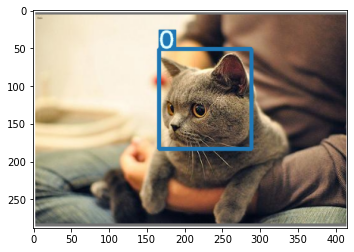

In [ ]:
img_path = 'demo/British_Shorthair_100.jpg'
label_path = 'demo/British_Shorthair_100.txt'
img0 = cv2.imread(img_path).astype('float32')
img_pad = letterbox(img0, new_shape=img_size, auto_size=32)[0]
img = img_pad[:, :, ::-1].transpose(2, 0, 1)  # BGR to RGB, to 3x416x416
img = np.ascontiguousarray(img)
img = torch.from_numpy(img).to(device)
img /= 255.0
img = torch.unsqueeze(img, 0)
h, w = img.shape[-2:]
p = model(img)

with open(label_path, 'r') as f:
    label = np.array([x.split() for x in f.read().splitlines()], dtype=np.float32)  # labels
label = np.insert(label, 0, 0)
targets = torch.from_numpy(label).to(device)
targets = torch.unsqueeze(targets, 0)
vis_label = plot_images(img, targets)
plt.imshow(vis_label)

In [ ]:
targets

tensor([[0.00000, 0.00000, 0.54700, 0.40813, 0.29400, 0.46084]], device='cuda:0')

In [ ]:
tcls, tbox, indices, anchors = build_targets(p, targets, model)  # targets

tcls: Ë°®Á§∫ÈÄôÂÄã target ÊâÄÂ±¨ÁöÑ class index

In [ ]:
tcls

[tensor([], device='cuda:0', dtype=torch.int64),
 tensor([0, 0, 0, 0, 0, 0], device='cuda:0'),
 tensor([0, 0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')]

tbox: xywh ÂÖ∂‰∏≠ xy ÁÇ∫ÈÄôÂÄã target Â∞çÁï∂Ââç grid_cell Â∑¶‰∏äËßíÁöÑÂÅèÁßªÈáè

In [ ]:
tbox

[tensor([], device='cuda:0', size=(0, 4)),
 tensor([[0.22200, 0.34639, 7.64400, 8.29518],
         [0.22200, 0.34639, 7.64400, 8.29518],
         [1.22200, 0.34639, 7.64400, 8.29518],
         [1.22200, 0.34639, 7.64400, 8.29518],
         [0.22200, 1.34639, 7.64400, 8.29518],
         [0.22200, 1.34639, 7.64400, 8.29518]], device='cuda:0'),
 tensor([[ 0.11100,  0.67319,  3.82200,  4.14759],
         [ 0.11100,  0.67319,  3.82200,  4.14759],
         [ 0.11100,  0.67319,  3.82200,  4.14759],
         [ 1.11100,  0.67319,  3.82200,  4.14759],
         [ 1.11100,  0.67319,  3.82200,  4.14759],
         [ 1.11100,  0.67319,  3.82200,  4.14759],
         [ 0.11100, -0.32681,  3.82200,  4.14759],
         [ 0.11100, -0.32681,  3.82200,  4.14759],
         [ 0.11100, -0.32681,  3.82200,  4.14759]], device='cuda:0')]

anchors: Ë°®Á§∫ÈÄôÂÄã target ÊâÄ‰ΩøÁî® anchor ÁöÑÂ∞∫Â∫¶ÔºàÁõ∏Â∞çÊñºÈÄôÂÄãfeature mapÔºâ

In [ ]:
anchors

[tensor([], device='cuda:0', size=(0, 2)), tensor([[3.87500, 2.81250],
         [3.68750, 7.43750],
         [3.87500, 2.81250],
         [3.68750, 7.43750],
         [3.87500, 2.81250],
         [3.68750, 7.43750]], device='cuda:0'), tensor([[ 3.62500,  2.81250],
         [ 4.87500,  6.18750],
         [11.65625, 10.18750],
         [ 3.62500,  2.81250],
         [ 4.87500,  6.18750],
         [11.65625, 10.18750],
         [ 3.62500,  2.81250],
         [ 4.87500,  6.18750],
         [11.65625, 10.18750]], device='cuda:0')]

In [ ]:
anchors = np.array([[10, 13], [16, 30], [33, 23], [30, 61], [62, 45], [59, 119], [116, 90], [156, 198], [373, 326]])
anch_masks = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
strides = np.array([8, 16, 32])
anchor_vec = []
for i in range(3):
    anc = []
    for j in range(3):
        anc.append(anchors[anch_masks[i][j]]/strides[i])
    anchor_vec.append(anc)
anchor_vec

[[array([       1.25,       1.625]),
  array([          2,        3.75]),
  array([      4.125,       2.875])],
 [array([      1.875,      3.8125]),
  array([      3.875,      2.8125]),
  array([     3.6875,      7.4375])],
 [array([      3.625,      2.8125]),
  array([      4.875,      6.1875]),
  array([     11.656,      10.188])]]

indices:
- b: Ë°®Á§∫ÈÄôÂÄã target Â±¨ÊñºÁöÑ image index
- a: Ë°®Á§∫ÈÄôÂÄã target ‰ΩøÁî®ÁöÑ anchor index
- gj: Á∂ìÈÅéÁØ©ÈÅ∏ÂæåÁ¢∫ÂÆöÊüêÂÄã target Âú®ÊüêÂÄãÁ∂≤Ê†º‰∏≠ÈÄ≤Ë°åÈ†êÊ∏¨(Ë®àÁÆóÊêçÂ§±)  gjË°®Á§∫ÈÄôÂÄãÁ∂≤Ê†ºÁöÑÂ∑¶‰∏äËßíyÂ∫ßÊ®ô
- gi: Ë°®Á§∫ÈÄôÂÄãÁ∂≤Ê†ºÁöÑÂ∑¶‰∏äËßí x Â∫ßÊ®ô

In [ ]:
indices

[(tensor([], device='cuda:0', dtype=torch.int64),
  tensor([], dtype=torch.int64),
  tensor([], device='cuda:0', dtype=torch.int64),
  tensor([], device='cuda:0', dtype=torch.int64)),
 (tensor([0, 0, 0, 0, 0, 0], device='cuda:0'),
  tensor([1, 2, 1, 2, 1, 2]),
  tensor([7, 7, 7, 7, 6, 6], device='cuda:0'),
  tensor([14, 14, 13, 13, 14, 14], device='cuda:0')),
 (tensor([0, 0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0'),
  tensor([0, 1, 2, 0, 1, 2, 0, 1, 2]),
  tensor([3, 3, 3, 3, 3, 3, 4, 4, 4], device='cuda:0'),
  tensor([7, 7, 7, 6, 6, 6, 7, 7, 7], device='cuda:0'))]

Ëß£Ë™™‰∏âÂ±§ yolo layer ÂàÜÂà•Ëº∏Âá∫ÁöÑ target 

In [ ]:
x, y = label[2:4]
x_, y_ = x*w, y*h

1. stride=8: ÂÅµÊ∏¨Â∞èÁâ©È´îÔºåanchor: [10, 13], [16, 30], [33, 23]

In [ ]:
grid = (w/8, h/8)
grid

(52.0, 36.0)

In [ ]:
# indices: b: Ë°®Á§∫ÈÄôÂÄã target Â±¨ÊñºÁöÑ image index
#          a: Ë°®Á§∫ÈÄôÂÄã target ‰ΩøÁî®ÁöÑ anchor index
#         gj: Á∂ìÈÅéÁØ©ÈÅ∏ÂæåÁ¢∫ÂÆöÊüêÂÄã target Âú®ÊüêÂÄãÁ∂≤Ê†º‰∏≠ÈÄ≤Ë°åÈ†êÊ∏¨(Ë®àÁÆóÊêçÂ§±)  gjË°®Á§∫ÈÄôÂÄãÁ∂≤Ê†ºÁöÑÂ∑¶‰∏äËßíyÂ∫ßÊ®ô
#         gi: Ë°®Á§∫ÈÄôÂÄãÁ∂≤Ê†ºÁöÑÂ∑¶‰∏äËßí x Â∫ßÊ®ô
indices[0]

(tensor([], device='cuda:0', dtype=torch.int64),
 tensor([], dtype=torch.int64),
 tensor([], device='cuda:0', dtype=torch.int64),
 tensor([], device='cuda:0', dtype=torch.int64))

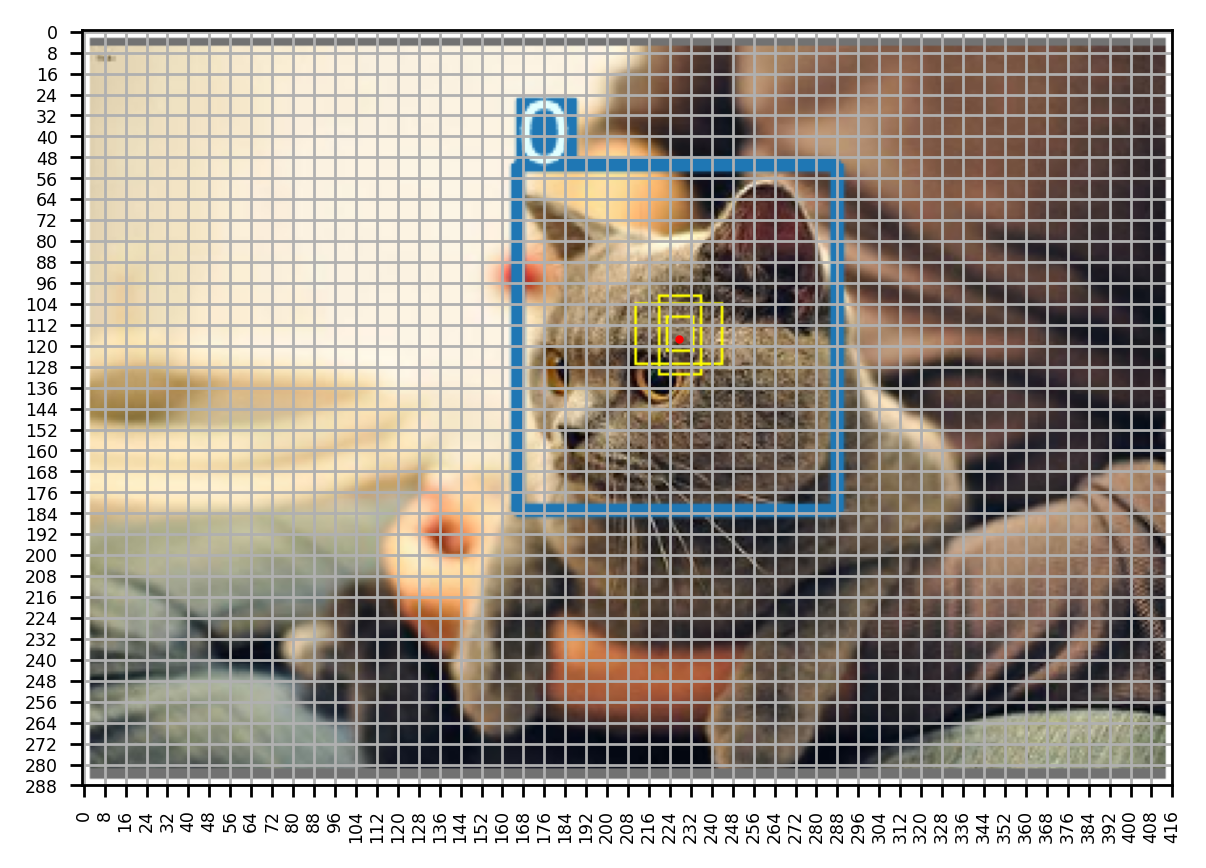

In [ ]:
anchor_1 = [[10, 13], [16, 30], [33, 23]]
anc_xy_1 = []
for anc_w, anc_h in anchor_1:
    anc_x1y1 = (int(28*8+4-anc_w/2), int(14*8+4-anc_h/2))
    anc_x2y2 = (int(28*8+4+anc_w/2), int(14*8+4+anc_h/2))
    anc_xy_1.append((anc_x1y1, anc_x2y2))

fig, ax = plt.subplots()
fig.set_dpi(250)
vis_label = plot_images(img, targets)
for anc in anc_xy_1: 
    cv2.rectangle(vis_label, anc[0], anc[1], [255, 255, 0], 1)
ax.imshow(vis_label)
ax.scatter(x_, y_, c='red', s=2)
ax.set_xticks(8*(np.arange(grid[0]+1)))
ax.set_yticks(8*(np.arange(grid[1]+1)))
ax.grid()
ax.tick_params(axis='x', labelrotation=90, labelsize=5)
ax.tick_params(axis='y', labelsize=5)

2. stride=16: ÂÅµÊ∏¨‰∏≠Áâ©È´îÔºåanchor: [30, 61], [62, 45], [59, 119]

In [ ]:
grid = (w/16, h/16)
grid

(26.0, 18.0)

In [ ]:
# indices: b: Ë°®Á§∫ÈÄôÂÄã target Â±¨ÊñºÁöÑ image index
#          a: Ë°®Á§∫ÈÄôÂÄã target ‰ΩøÁî®ÁöÑ anchor index
#         gj: Á∂ìÈÅéÁØ©ÈÅ∏ÂæåÁ¢∫ÂÆöÊüêÂÄã target Âú®ÊüêÂÄãÁ∂≤Ê†º‰∏≠ÈÄ≤Ë°åÈ†êÊ∏¨(Ë®àÁÆóÊêçÂ§±)  gjË°®Á§∫ÈÄôÂÄãÁ∂≤Ê†ºÁöÑÂ∑¶‰∏äËßíyÂ∫ßÊ®ô
#         gi: Ë°®Á§∫ÈÄôÂÄãÁ∂≤Ê†ºÁöÑÂ∑¶‰∏äËßí x Â∫ßÊ®ô
indices[1]

(tensor([0, 0, 0, 0, 0, 0], device='cuda:0'),
 tensor([1, 2, 1, 2, 1, 2]),
 tensor([7, 7, 7, 7, 6, 6], device='cuda:0'),
 tensor([14, 14, 13, 13, 14, 14], device='cuda:0'))

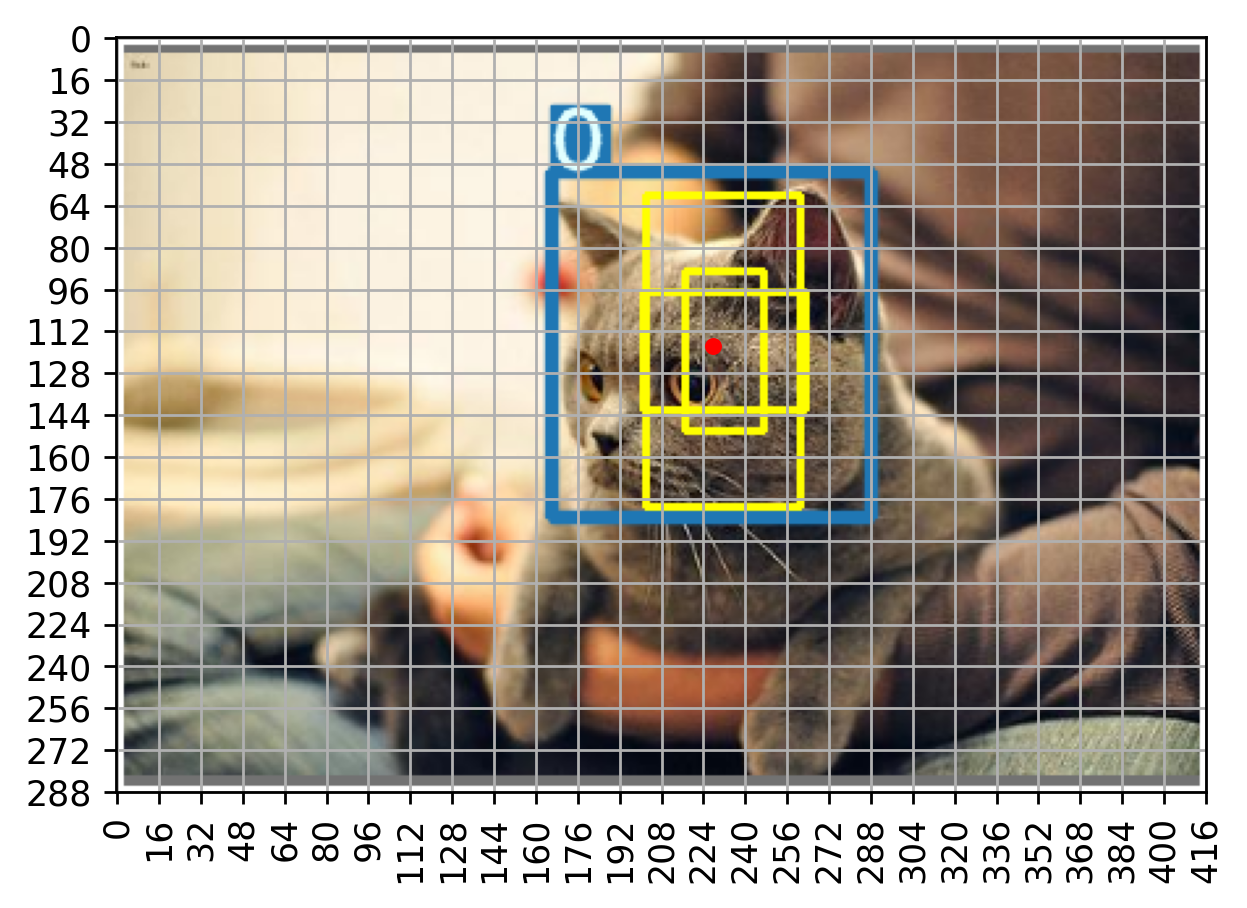

In [ ]:
anchor_2 = [[30, 61], [62, 45], [59, 119]]
anc_xy_2 = []
for anc_w, anc_h in anchor_2:
    anc_x1y1 = (int(14*16+8-anc_w/2), int(7*16+8-anc_h/2))
    anc_x2y2 = (int(14*16+8+anc_w/2), int(7*16+8+anc_h/2))
    anc_xy_2.append((anc_x1y1, anc_x2y2))

fig, ax = plt.subplots()
fig.set_dpi(250)
vis_label = plot_images(img, targets)
for anc in anc_xy_2: 
    cv2.rectangle(vis_label, anc[0], anc[1], [255, 255, 0], 2)
ax.imshow(vis_label)
ax.scatter(x_, y_, c='red', s=15)
ax.set_xticks(16*(np.arange(grid[0]+1)))
ax.set_yticks(16*(np.arange(grid[1]+1)))
ax.grid()
ax.tick_params(axis='x', labelrotation=90)

3. stride=32: ÂÅµÊ∏¨Â§ßÁâ©È´îÔºåanchor: [116, 90], [156, 198], [373, 326]

In [ ]:
grid = (w/32, h/32)
grid

(13.0, 9.0)

In [ ]:
# indices: b: Ë°®Á§∫ÈÄôÂÄã target Â±¨ÊñºÁöÑ image index
#          a: Ë°®Á§∫ÈÄôÂÄã target ‰ΩøÁî®ÁöÑ anchor index
#         gj: Á∂ìÈÅéÁØ©ÈÅ∏ÂæåÁ¢∫ÂÆöÊüêÂÄã target Âú®ÊüêÂÄãÁ∂≤Ê†º‰∏≠ÈÄ≤Ë°åÈ†êÊ∏¨(Ë®àÁÆóÊêçÂ§±)  gjË°®Á§∫ÈÄôÂÄãÁ∂≤Ê†ºÁöÑÂ∑¶‰∏äËßíyÂ∫ßÊ®ô
#         gi: Ë°®Á§∫ÈÄôÂÄãÁ∂≤Ê†ºÁöÑÂ∑¶‰∏äËßí x Â∫ßÊ®ô
indices[2]

(tensor([0, 0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0'),
 tensor([0, 1, 2, 0, 1, 2, 0, 1, 2]),
 tensor([3, 3, 3, 3, 3, 3, 4, 4, 4], device='cuda:0'),
 tensor([7, 7, 7, 6, 6, 6, 7, 7, 7], device='cuda:0'))

ÈÄôÈÇäÊàëÂÄëÊääÂ∞çÊáâÁöÑÊâÄÊúâÊ≠£Ê®£Êú¨ÈÉΩÁï´Âá∫‰æÜÁµ¶ÂêÑ‰ΩçÁúã

In [ ]:
anchor_3 = [[116, 90], [156, 198], [373, 326]]
anc_xy_3 = []
for anc_w, anc_h in anchor_3:
    anc_x1y1 = (int(7*32+16-anc_w/2), int(3*32+16-anc_h/2))
    anc_x2y2 = (int(7*32+16+anc_w/2), int(3*32+16+anc_h/2))
    anc_xy_3.append((anc_x1y1, anc_x2y2))
    
for anc_w, anc_h in anchor_3:
    anc_x1y1 = (int(6*32+16-anc_w/2), int(3*32+16-anc_h/2))
    anc_x2y2 = (int(6*32+16+anc_w/2), int(3*32+16+anc_h/2))
    anc_xy_3.append((anc_x1y1, anc_x2y2))
    
for anc_w, anc_h in anchor_3:
    anc_x1y1 = (int(7*32+16-anc_w/2), int(4*32+16-anc_h/2))
    anc_x2y2 = (int(7*32+16+anc_w/2), int(4*32+16+anc_h/2))
    anc_xy_3.append((anc_x1y1, anc_x2y2))

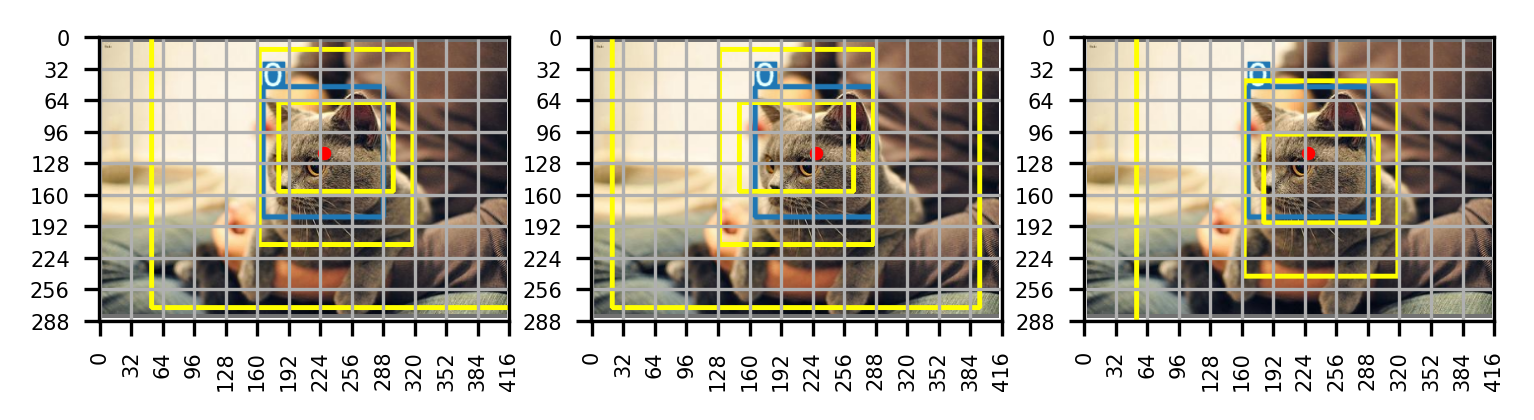

In [ ]:
fig, ax = plt.subplots(1, 3)
fig.set_dpi(300)
for i in range(3):
    vis_label = plot_images(img, targets)
    for anc in anc_xy_3[3*i:3*(i+1)]: 
        cv2.rectangle(vis_label, anc[0], anc[1], [255, 255, 0], 3)
    ax[i].imshow(vis_label)
    ax[i].scatter(x_, y_, c='red', s=5)
    ax[i].set_xticks(32*(np.arange(grid[0]+1)))
    ax[i].set_yticks(32*(np.arange(grid[1]+1)))
    ax[i].grid()
    ax[i].tick_params(axis='x', labelrotation=90, labelsize=5)
    ax[i].tick_params(axis='y', labelsize=5)

loss ÂáΩÊï∏ÂÆöÁæ©

In [ ]:
from utils.loss import smooth_BCE
def compute_loss(p, targets, model):  # predictions, targets, model
    device = targets.device
    
    # ÂàùÂßãÂåñ lcls, lbox, lobj ‰∏âÁ®ÆÊêçÂ§±ÂÄº tensor([0.])
    lcls, lbox, lobj = torch.zeros(1, device=device), torch.zeros(1, device=device), torch.zeros(1, device=device)
    tcls, tbox, indices, anchors = build_targets(p, targets, model)  # targets
    h = model.hyp  # hyperparameters

    # Define criteria
    BCEcls = nn.BCEWithLogitsLoss(pos_weight=torch.Tensor([h['cls_pw']])).to(device)
    BCEobj = nn.BCEWithLogitsLoss(pos_weight=torch.Tensor([h['obj_pw']])).to(device)

    # Class label smoothing https://arxiv.org/pdf/1902.04103.pdf eqn 3
    cp, cn = smooth_BCE(eps=0.0)

    # Losses
    nt = 0  # number of targets
    no = len(p)  # number of outputs
    
    # balance Áî®‰æÜË®≠ÁΩÆ‰∏âÂÄã feature map Â∞çÊáâËº∏Âá∫ÁöÑÁΩÆ‰ø°Â∫¶ÊêçÂ§±‰øÇÊï∏ (Âπ≥Ë°°‰∏âÂÄã feature map ÁöÑÁΩÆ‰ø°Â∫¶ÊêçÂ§±)
    # ÂæûÂ∑¶Âà∞Âè≥ÂàÜÂà•Â∞çÊáâÂ§ß feature map (ÂÅµÊ∏¨Â∞èÁõÆÊ®ô) Âà∞Â∞è feature map (ÂÅµÊ∏¨Â§ßÁõÆÊ®ô)
    # ÊÄùË∑ØÔºö‰∏ÄËà¨‰æÜË™™ÔºåÂÅµÊ∏¨Â∞èÁâ©È´îÁöÑÈõ£Â∫¶Â§ß‰∏ÄÈªûÔºåÊâÄ‰ª•ÊúÉÂ¢ûÂä†Â§ßÁâπÂæµÂúñÁöÑÊêçÂ§±‰øÇÊï∏ÔºåËÆìÊ®°ÂûãÊõ¥Âä†ÂÅ¥ÈáçÂ∞èÁâ©È´îÁöÑÂÅµÊ∏¨
    balance = [4.0, 1.0, 0.4] if no == 3 else [4.0, 1.0, 0.4, 0.1]  # P3-5 or P3-6
    balance = [4.0, 1.0, 0.5, 0.4, 0.1] if no == 5 else balance
    for i, pi in enumerate(p):  # layer index, layer predictions
        b, a, gj, gi = indices[i]  # image, anchor, gridy, gridx
        tobj = torch.zeros_like(pi[..., 0], device=device)  # target obj

        n = b.shape[0]  # number of targets
        if n:
            nt += n  # cumulative targets
            ps = pi[b, a, gj, gi]  # prediction subset corresponding to targets

            # Regression
            pxy = ps[:, :2].sigmoid() * 2. - 0.5
            pwh = (ps[:, 2:4].sigmoid() * 2) ** 2 * anchors[i]
            pbox = torch.cat((pxy, pwh), 1).to(device)  # predicted box
            iou = bbox_iou(pbox.T, tbox[i], x1y1x2y2=False, CIoU=True)  # iou(prediction, target)
            lbox += (1.0 - iou).mean()  # iou loss

            # Objectness
            tobj[b, a, gj, gi] = (1.0 - model.gr) + model.gr * iou.detach().clamp(0).type(tobj.dtype)  # iou ratio

            # Classification
            if model.nc > 1:  # cls loss (only if multiple classes)
                t = torch.full_like(ps[:, 5:], cn, device=device)  # targets
                t[range(n), tcls[i]] = cp
                lcls += BCEcls(ps[:, 5:], t)  # BCE

        lobj += BCEobj(pi[..., 4], tobj) * balance[i]  # obj loss

    s = 3 / no  # output count scaling
    lbox *= h['box'] * s
    lobj *= h['obj'] * s * (1.4 if no >= 4 else 1.)
    lcls *= h['cls'] * s
    bs = tobj.shape[0]  # batch size

    loss = lbox + lobj + lcls
    return loss * bs, torch.cat((lbox, lobj, lcls, loss)).detach()

### 4. ÂÑ™ÂåñÂô®ÂÆöÁæ©ÂíåÂ≠∏ÁøíÁéáÁ≠ñÁï•

SGD+WarmUP_CosineAnnealingLR

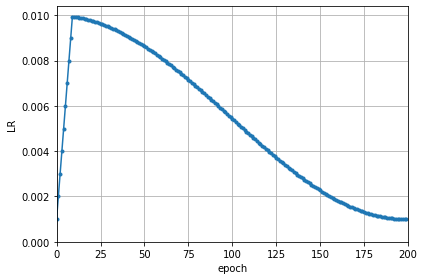

In [ ]:
optimizer = optim.SGD(model.parameters(), 
                      lr=hyp['lr0'],
                      momentum=hyp['momentum'],
                      nesterov=True)  

warm_up_iter = epochs//20
lf = lambda x: x / warm_up_iter if x < warm_up_iter else \
    ((1 + math.cos(x * math.pi / epochs)) / 2) * (1 - hyp['lrf']) + hyp['lrf']

scheduler = optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=lf)
plot_lr_scheduler(optimizer, scheduler, epochs)

### 5. ÈñãÂßãË®ìÁ∑¥
Colab ÊúÉÈö®Ê©üÂàÜÈÖçÊúÉÈö®Ê©üÂàÜÈÖç K80 Âíå T4 Áµ¶ÂÖçË≤ªÁî®Êà∂ÔºåÁÆóÂäõÊúâÂ∑ÆÂà•Ôºö
- K80 Â§ßÊ¶ÇÈúÄË¶ÅË®ìÁ∑¥ÂõõÂÄãÂ∞èÊôÇ
- T4 Â§ßÊ¶ÇÈúÄË¶ÅË®ìÁ∑¥‰∏ÄÂÄãÂçäÂ∞èÊôÇ

In [ ]:
!nvidia-smi

Sat Mar 12 09:23:30 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    56W / 149W |   1756MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

     epoch   memeory  box_loss  obj_loss  cls_loss  total_loss   targets  img_size


     1/300     10.3G     0.114   0.02893   0.01724      0.1602         8       448: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:42<00:00,  1.17it/s]
     2/300     10.3G    0.1106   0.02982   0.01731      0.1577        11       448: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:43<00:00,  1.15it/s]
     3/300     10.3G    0.1034   0.03276   0.01652      0.1527        11       416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:44<00:00,  1.13it/s]
     4/300     10.3G    0.1004   0.03224   0.01624      0.1489         7       448: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:42<00:00,  1.19it/s]
     5/300     10.3G   0.09129   0.03147    0.0157      0.1385        10       448: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:43<00:00,  1.14it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 7/7 [00:06<00:00,  1.10it/s]


                 all          50          50     0.00183       0.577     0.00216    0.000437


     6/300     10.3G    0.0912   0.03393   0.01543      0.1406         9       480: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:43<00:00,  1.15it/s]
     7/300     10.3G   0.09019   0.03279   0.01515      0.1381        10       416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:44<00:00,  1.12it/s]
     8/300     10.3G    0.0874   0.03685   0.01516      0.1394        10       480: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:43<00:00,  1.15it/s]
     9/300     10.3G   0.08933   0.03474    0.0153      0.1394        16       416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:43<00:00,  1.15it/s]
    10/300     10.3G   0.08805   0.03532   0.01518      0.1386        12       416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:42<00:00,  1.16it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 7/7 [00:04<00:00,  1.51it/s]


                 all          50           0           0           0           0           0


    11/300     10.3G   0.08567    0.0348   0.01468      0.1352        13       416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:42<00:00,  1.17it/s]
    12/300     10.3G   0.08739   0.03478    0.0144      0.1366         7       384: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:42<00:00,  1.17it/s]
    13/300     10.3G   0.08378   0.03911   0.01504      0.1379        10       448: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:43<00:00,  1.15it/s]
    14/300     10.3G   0.08714   0.03775   0.01487      0.1398        11       480: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:42<00:00,  1.18it/s]
    15/300     10.3G   0.08348   0.03905   0.01483      0.1374        12       416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:42<00:00,  1.18it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 7/7 [00:04<00:00,  1.57it/s]


                 all          50          50           0           0     0.00282    0.000321


    16/300     10.3G   0.08451    0.0382    0.0143       0.137        13       320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:42<00:00,  1.16it/s]
    17/300     10.3G   0.08408   0.03779   0.01459      0.1365        11       320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:40<00:00,  1.23it/s]
    18/300     10.3G   0.08306   0.03798   0.01485      0.1359         7       320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:44<00:00,  1.13it/s]
    19/300     10.3G   0.08569   0.03605   0.01479      0.1365         5       448: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:43<00:00,  1.14it/s]
    20/300     10.3G   0.08635   0.03406   0.01479      0.1352         7       352: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:44<00:00,  1.13it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 7/7 [00:04<00:00,  1.44it/s]


                 all          50          50           0           0     0.00257    0.000631


    21/300     10.3G   0.08127   0.03338    0.0145      0.1291        12       384: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:44<00:00,  1.12it/s]
    22/300     10.3G   0.08196   0.03867    0.0148      0.1354         9       352: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:43<00:00,  1.14it/s]
    23/300     10.3G   0.08593   0.03697    0.0142      0.1371        13       384: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:41<00:00,  1.19it/s]
    24/300     10.3G   0.08503   0.03658   0.01491      0.1365         9       320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:42<00:00,  1.18it/s]
    25/300     10.3G   0.08471   0.03616   0.01471      0.1356        11       416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:44<00:00,  1.11it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 7/7 [00:04<00:00,  1.45it/s]


                 all          50          50           0           0     0.00559     0.00142


    26/300     10.3G   0.08271   0.03878    0.0154      0.1369         5       512: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:44<00:00,  1.12it/s]
    27/300     10.3G   0.08176   0.03693   0.01539      0.1341         6       352: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:43<00:00,  1.14it/s]
    28/300     10.3G   0.08173   0.03295   0.01501      0.1297        10       448: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:45<00:00,  1.10it/s]
    29/300     10.3G   0.08153   0.03538   0.01441      0.1313         9       448: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:44<00:00,  1.13it/s]
    30/300     10.3G   0.08471   0.03659   0.01477      0.1361         6       352: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:42<00:00,  1.17it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 7/7 [00:04<00:00,  1.41it/s]


                 all          50          50           0           0     0.00552     0.00144


    31/300     10.3G   0.08485   0.03566   0.01457      0.1351         7       448: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:43<00:00,  1.16it/s]
    32/300     10.3G   0.07903   0.03657   0.01465      0.1303         7       480: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:43<00:00,  1.14it/s]
    33/300     10.3G   0.08317   0.03532   0.01478      0.1333         4       544: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:42<00:00,  1.17it/s]
    34/300     10.3G   0.08019   0.03772   0.01462      0.1325         8       480: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:42<00:00,  1.18it/s]
    35/300     10.3G   0.08092   0.03711   0.01431      0.1323        10       416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:42<00:00,  1.18it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 7/7 [00:04<00:00,  1.42it/s]


                 all          50          50           0           0     0.00408      0.0009


    36/300     10.3G   0.07935   0.03877   0.01382       0.132         7       512: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:41<00:00,  1.20it/s]
    37/300     10.3G   0.07805   0.03717   0.01432      0.1295        13       384: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:43<00:00,  1.16it/s]
    38/300     10.3G   0.07944   0.03947   0.01465      0.1336         9       352: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:41<00:00,  1.21it/s]
    39/300     10.3G   0.07968   0.03245   0.01459      0.1267         9       480: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:45<00:00,  1.11it/s]
    40/300     10.3G   0.07498   0.03392    0.0142      0.1231         9       416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:44<00:00,  1.12it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 7/7 [00:04<00:00,  1.40it/s]


                 all          50          50           0           0     0.00526     0.00124


    41/300     10.3G   0.07828   0.04002   0.01441      0.1327        12       416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:41<00:00,  1.21it/s]
    42/300     10.3G    0.0789   0.03849   0.01461       0.132         8       416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:41<00:00,  1.19it/s]
    43/300     10.3G   0.07922   0.03758   0.01476      0.1315        11       512: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:42<00:00,  1.18it/s]
    44/300     10.3G   0.07715     0.037   0.01485       0.129         8       480: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:43<00:00,  1.14it/s]
    45/300     10.3G   0.07785   0.03501   0.01402      0.1269        10       544: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:43<00:00,  1.14it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 7/7 [00:05<00:00,  1.36it/s]


                 all          50          50           0           0      0.0123     0.00186


    46/300     10.3G   0.07903   0.03646   0.01431      0.1298         7       512: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:42<00:00,  1.18it/s]
    47/300     10.3G   0.07834   0.03747   0.01436      0.1302         9       384: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:42<00:00,  1.18it/s]
    48/300     10.3G   0.07795    0.0365   0.01409      0.1285         6       480: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:42<00:00,  1.18it/s]
    49/300     10.3G   0.07554   0.03536   0.01462      0.1255        12       384: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:44<00:00,  1.13it/s]
    50/300     10.3G   0.07561   0.03328   0.01422      0.1231         8       384: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:44<00:00,  1.13it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 7/7 [00:04<00:00,  1.45it/s]


                 all          50          50         0.5      0.0312      0.0418     0.00489


    51/300     10.3G   0.07363   0.03533     0.014       0.123        10       384: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:44<00:00,  1.11it/s]
    52/300     10.3G    0.0762   0.03596   0.01439      0.1265         2       416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:42<00:00,  1.17it/s]
    53/300     10.3G   0.07518   0.03948   0.01489      0.1295         5       512: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:38<00:00,  1.31it/s]
    54/300     10.3G   0.07328   0.03492   0.01429      0.1225         7       480: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:45<00:00,  1.09it/s]
    55/300     10.3G   0.07368   0.03523   0.01433      0.1232         9       512: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:43<00:00,  1.14it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 7/7 [00:04<00:00,  1.42it/s]


                 all          50          50           0           0      0.0109     0.00224


    56/300     10.3G   0.07615   0.03901   0.01479      0.1299         9       288: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:42<00:00,  1.19it/s]
    57/300     10.3G    0.0746    0.0334   0.01441      0.1224        11       352: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:44<00:00,  1.13it/s]
    58/300     10.3G   0.07553   0.03788   0.01459       0.128         3       448: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:43<00:00,  1.16it/s]
    59/300     10.3G    0.0774   0.03692     0.014      0.1283         8       512: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:41<00:00,  1.20it/s]
    60/300     10.3G   0.07235   0.03489   0.01417      0.1214        12       384: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:44<00:00,  1.13it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 7/7 [00:04<00:00,  1.40it/s]


                 all          50          50           0           0      0.0149     0.00398


    61/300     10.3G   0.07448   0.03587    0.0147       0.125         4       352: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:39<00:00,  1.27it/s]
    62/300     10.3G   0.07447   0.03414   0.01486      0.1235        13       384: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:45<00:00,  1.09it/s]
    63/300     10.3G   0.07063   0.03471   0.01413      0.1195         8       416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:43<00:00,  1.16it/s]
    64/300     10.3G   0.07057   0.03543   0.01493      0.1209        11       512: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:43<00:00,  1.16it/s]
    65/300     10.3G   0.07224   0.03632   0.01393      0.1225        11       544: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:42<00:00,  1.16it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 7/7 [00:04<00:00,  1.42it/s]


                 all          50          50           0           0      0.0273     0.00616


    66/300     10.3G   0.07133   0.03764    0.0148      0.1238        13       480: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:41<00:00,  1.20it/s]
    67/300     10.3G   0.06917   0.03441   0.01473      0.1183         8       384: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:43<00:00,  1.16it/s]
    68/300     10.3G   0.07128   0.03571   0.01396       0.121        11       320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:44<00:00,  1.12it/s]
    69/300     10.3G   0.06998   0.03557    0.0144      0.1199         7       416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:43<00:00,  1.15it/s]
    70/300     10.3G   0.07121   0.03509   0.01481      0.1211        14       416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:43<00:00,  1.14it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 7/7 [00:04<00:00,  1.43it/s]


                 all          50          50           0           0      0.0197     0.00489


    71/300     10.3G   0.06818    0.0325   0.01415      0.1148        11       384: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:46<00:00,  1.07it/s]
    72/300     10.3G   0.07166   0.03818   0.01423      0.1241         6       352: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:39<00:00,  1.28it/s]
    73/300     10.3G   0.06919   0.03254   0.01466      0.1164        11       512: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:45<00:00,  1.09it/s]
    74/300     10.3G   0.07121   0.03633   0.01437      0.1219        15       544: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:43<00:00,  1.14it/s]
    75/300     10.3G   0.06778   0.03696   0.01399      0.1187        10       480: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:42<00:00,  1.17it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 7/7 [00:04<00:00,  1.43it/s]


                 all          50          50      0.0364      0.0735       0.075      0.0224


    76/300     10.3G    0.0684   0.03486   0.01474       0.118         5       480: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:42<00:00,  1.18it/s]
    77/300     10.3G   0.07114   0.03748   0.01394      0.1226         9       448: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:40<00:00,  1.24it/s]
    78/300     10.3G   0.06972   0.03312   0.01477      0.1176        12       480: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:44<00:00,  1.13it/s]
    79/300     10.3G   0.06741   0.03255   0.01394      0.1139        11       512: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:45<00:00,  1.09it/s]
    80/300     10.3G   0.07091     0.033   0.01484      0.1187        12       320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:43<00:00,  1.14it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 7/7 [00:04<00:00,  1.42it/s]


                 all          50          50       0.186       0.167       0.118      0.0297


    81/300     10.3G   0.06762   0.03346   0.01466      0.1157         5       512: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:43<00:00,  1.16it/s]
    82/300     10.3G   0.06923   0.03608   0.01421      0.1195        10       320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:43<00:00,  1.16it/s]
    83/300     10.3G   0.06718   0.03126   0.01387      0.1123        13       480: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:44<00:00,  1.12it/s]
    84/300     10.3G   0.06619   0.03664   0.01418       0.117         7       384: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:41<00:00,  1.20it/s]
    85/300     10.3G   0.06857   0.03721   0.01449      0.1203        11       352: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:40<00:00,  1.24it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 7/7 [00:04<00:00,  1.41it/s]


                 all          50          50      0.0289      0.0607     0.00778     0.00302


    86/300     10.3G   0.06555   0.03328   0.01439      0.1132        11       320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:43<00:00,  1.15it/s]
    87/300     10.3G   0.06276   0.03283    0.0138      0.1094         8       320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:41<00:00,  1.20it/s]
    88/300     10.3G   0.06556   0.03488   0.01441      0.1149        13       352: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:42<00:00,  1.18it/s]
    89/300     10.3G     0.066   0.03395   0.01466      0.1146        15       384: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:44<00:00,  1.13it/s]
    90/300     10.3G   0.06566   0.03454   0.01427      0.1145        10       480: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:42<00:00,  1.17it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 7/7 [00:04<00:00,  1.44it/s]


                 all          50          50       0.049      0.0846      0.0435      0.0115


    91/300     10.3G   0.06515   0.03326   0.01417      0.1126        13       416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:42<00:00,  1.18it/s]
    92/300     10.3G   0.06422   0.03302   0.01468      0.1119         7       512: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:45<00:00,  1.10it/s]
    93/300     10.3G   0.06447   0.03559    0.0144      0.1145         9       320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:43<00:00,  1.16it/s]
    94/300     10.3G   0.06666   0.03388   0.01446       0.115         9       384: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:41<00:00,  1.21it/s]
    95/300     10.3G   0.06369   0.02922    0.0147      0.1076        13       544: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:45<00:00,  1.09it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 7/7 [00:04<00:00,  1.44it/s]


                 all          50          50       0.137       0.423       0.209      0.0738


    96/300     10.3G    0.0632   0.03168   0.01443      0.1093         8       384: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:45<00:00,  1.10it/s]
    97/300     10.3G   0.06609   0.03366   0.01475      0.1145         5       512: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:42<00:00,  1.17it/s]
    98/300     10.3G   0.06333   0.03605   0.01441      0.1138        11       384: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:42<00:00,  1.18it/s]
    99/300     10.3G   0.06105   0.03468   0.01395      0.1097        13       384: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:42<00:00,  1.17it/s]
   100/300     10.3G     0.063    0.0302   0.01336      0.1066         7       480: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:42<00:00,  1.18it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 7/7 [00:04<00:00,  1.45it/s]


                 all          50          50        0.15       0.379       0.166      0.0497


   101/300     10.3G   0.06235   0.03524   0.01385      0.1114        10       512: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:41<00:00,  1.20it/s]
   102/300     10.3G   0.06175   0.03182    0.0146      0.1082         8       320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:45<00:00,  1.11it/s]
   103/300     10.3G   0.06357   0.03436   0.01397      0.1119         7       480: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:41<00:00,  1.20it/s]
   104/300     10.3G   0.06212   0.03614   0.01403      0.1123         9       384: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:42<00:00,  1.18it/s]
   105/300     10.3G   0.06097   0.03141   0.01423      0.1066         4       352: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:41<00:00,  1.20it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 7/7 [00:04<00:00,  1.44it/s]


                 all          50          50      0.0405       0.561      0.0364      0.0109


   106/300     10.3G   0.06051   0.02974   0.01375       0.104         8       512: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:46<00:00,  1.08it/s]
   107/300     10.3G   0.06462   0.03429   0.01445      0.1134         8       480: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:42<00:00,  1.17it/s]
   108/300     10.3G   0.06299   0.03582   0.01405      0.1129         8       480: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:42<00:00,  1.19it/s]
   109/300     10.3G   0.06208   0.03312   0.01383       0.109         8       448: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:43<00:00,  1.16it/s]
   110/300     10.3G   0.05931   0.03081   0.01389       0.104         9       512: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:41<00:00,  1.20it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 7/7 [00:04<00:00,  1.45it/s]


                 all          50          50      0.0977       0.497      0.0966      0.0282


   111/300     10.3G   0.06019    0.0314   0.01431      0.1059         4       352: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:45<00:00,  1.09it/s]
   112/300     10.3G   0.05888   0.03282   0.01406      0.1058         9       352: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:44<00:00,  1.12it/s]
   113/300     10.3G   0.06099   0.03398   0.01374      0.1087        11       544: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:41<00:00,  1.19it/s]
   114/300     10.3G   0.05959   0.03205   0.01382      0.1055        11       512: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:44<00:00,  1.13it/s]
   115/300     10.3G   0.05985   0.03296    0.0142       0.107         6       384: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:42<00:00,  1.17it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 7/7 [00:04<00:00,  1.45it/s]


                 all          50          50       0.149       0.333       0.153      0.0674


   116/300     10.3G   0.06201   0.03128     0.014      0.1073        15       384: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:43<00:00,  1.14it/s]
   117/300     10.3G   0.05819   0.03629   0.01416      0.1086         6       416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:38<00:00,  1.28it/s]
   118/300     10.3G   0.05923   0.03174   0.01344      0.1044        10       512: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:43<00:00,  1.14it/s]
   119/300     10.3G   0.05967   0.03402    0.0139      0.1076         7       416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:41<00:00,  1.20it/s]
   120/300     10.3G   0.05984   0.03279   0.01458      0.1072        12       320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:42<00:00,  1.17it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 7/7 [00:04<00:00,  1.43it/s]


                 all          50          50       0.186       0.564       0.251       0.109


   121/300     10.3G   0.05726   0.03078   0.01315      0.1012         9       352: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:43<00:00,  1.14it/s]
   122/300     10.3G   0.05949   0.03524   0.01387      0.1086         8       480: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:41<00:00,  1.21it/s]
   123/300     10.3G   0.05952   0.03411    0.0145      0.1081         8       416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:42<00:00,  1.18it/s]
   124/300     10.3G   0.05827   0.03324   0.01392      0.1054        13       480: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:43<00:00,  1.15it/s]
   125/300     10.3G   0.05796   0.03322   0.01419      0.1054         9       352: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:42<00:00,  1.17it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 7/7 [00:05<00:00,  1.38it/s]


                 all          50          50       0.124       0.658       0.127        0.06


   126/300     10.3G   0.05481   0.03033   0.01394     0.09908        11       352: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:43<00:00,  1.16it/s]
   127/300     10.3G   0.05807   0.03174   0.01403      0.1038        12       352: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:43<00:00,  1.16it/s]
   128/300     10.3G   0.05582   0.03057    0.0138      0.1002         9       448: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:45<00:00,  1.11it/s]
   129/300     10.3G   0.06057   0.02934   0.01382      0.1037        13       384: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:43<00:00,  1.14it/s]
   130/300     10.3G   0.05662   0.02963   0.01384      0.1001        10       416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:43<00:00,  1.14it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 7/7 [00:04<00:00,  1.41it/s]


                 all          50          50       0.125       0.684       0.254       0.111


   131/300     10.3G    0.0609   0.02942   0.01395      0.1043        12       320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:43<00:00,  1.14it/s]
   132/300     10.3G   0.05762   0.03163   0.01389      0.1031        11       352: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:41<00:00,  1.21it/s]
   133/300     10.3G   0.05808    0.0299   0.01422      0.1022        11       448: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:42<00:00,  1.19it/s]
   134/300     10.3G   0.05912   0.03363   0.01393      0.1067        10       320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:44<00:00,  1.13it/s]
   135/300     10.3G   0.05772   0.03165   0.01387      0.1032        10       320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:42<00:00,  1.18it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 7/7 [00:04<00:00,  1.45it/s]


                 all          50          50       0.125       0.746       0.142      0.0636


   136/300     10.3G    0.0599   0.03154   0.01428      0.1057         5       480: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:43<00:00,  1.14it/s]
   137/300     10.3G   0.05628   0.03249   0.01374      0.1025        11       352: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:42<00:00,  1.18it/s]
   138/300     10.3G   0.05689   0.03523   0.01415      0.1063        10       384: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:40<00:00,  1.23it/s]
   139/300     10.3G   0.05759   0.03277   0.01405      0.1044         9       416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:43<00:00,  1.15it/s]
   140/300     10.3G   0.05727   0.03205   0.01389      0.1032        10       384: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:41<00:00,  1.19it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 7/7 [00:04<00:00,  1.46it/s]


                 all          50          50         0.2       0.778       0.351        0.17


   141/300     10.3G   0.05775   0.03391   0.01348      0.1051         5       384: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:42<00:00,  1.17it/s]
   142/300     10.3G   0.05619   0.03583   0.01384      0.1059         4       352: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:43<00:00,  1.16it/s]
   143/300     10.3G   0.05617   0.02845   0.01364     0.09826         9       384: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:45<00:00,  1.11it/s]
   144/300     10.3G   0.05853   0.03218    0.0134      0.1041         9       512: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:42<00:00,  1.17it/s]
   145/300     10.3G   0.05751   0.03392   0.01417      0.1056         9       416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:42<00:00,  1.18it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 7/7 [00:04<00:00,  1.41it/s]


                 all          50          50       0.156       0.686       0.291       0.157


   146/300     10.3G   0.05893    0.0327   0.01365      0.1053         7       448: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:43<00:00,  1.14it/s]
   147/300     10.3G   0.05795   0.03291   0.01385      0.1047        13       384: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:43<00:00,  1.16it/s]
   148/300     10.3G   0.05572   0.03214   0.01363      0.1015        11       544: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:42<00:00,  1.18it/s]
   149/300     10.3G   0.05556   0.03198    0.0141      0.1016         9       288: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:42<00:00,  1.17it/s]
   150/300     10.3G   0.05637   0.03029   0.01321     0.09987         8       448: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:43<00:00,  1.14it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 7/7 [00:04<00:00,  1.45it/s]


                 all          50          50      0.0319        0.55      0.0314      0.0129


   151/300     10.3G   0.05638   0.03235   0.01317      0.1019        11       352: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:41<00:00,  1.20it/s]
   152/300     10.3G   0.05661   0.03035    0.0139      0.1009         9       480: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:42<00:00,  1.17it/s]
   153/300     10.3G    0.0542   0.02975   0.01376     0.09771         7       352: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:42<00:00,  1.17it/s]
   154/300     10.3G   0.05453   0.03377   0.01347      0.1018        11       448: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:42<00:00,  1.17it/s]
   155/300     10.3G   0.05366   0.03059   0.01372     0.09797        11       448: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:44<00:00,  1.12it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 7/7 [00:04<00:00,  1.47it/s]


                 all          50          50       0.168       0.732       0.307       0.142


   156/300     10.3G   0.05356   0.02632   0.01426     0.09414        12       384: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:45<00:00,  1.09it/s]
   157/300     10.3G   0.05645    0.0338   0.01313      0.1034         8       352: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:41<00:00,  1.20it/s]
   158/300     10.3G   0.05625   0.02958   0.01304     0.09886        16       448: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:42<00:00,  1.19it/s]
   159/300     10.3G   0.05831   0.03504    0.0136       0.107         9       352: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:37<00:00,  1.32it/s]
   160/300     10.3G   0.05225   0.02985   0.01324     0.09534         9       352: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:44<00:00,  1.12it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 7/7 [00:04<00:00,  1.44it/s]


                 all          50          50       0.117       0.748       0.135      0.0646


   161/300     10.3G   0.05341   0.03174   0.01351     0.09866         8       384: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:43<00:00,  1.15it/s]
   162/300     10.3G     0.054   0.02751   0.01302     0.09453        10       384: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:44<00:00,  1.14it/s]
   163/300     10.3G   0.05413   0.03003   0.01302     0.09718         7       448: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:42<00:00,  1.18it/s]
   164/300     10.3G   0.05308   0.02688   0.01292     0.09288         3       448: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:45<00:00,  1.11it/s]
   165/300     10.3G   0.05546   0.03059   0.01383     0.09988         6       448: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:43<00:00,  1.14it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 7/7 [00:04<00:00,  1.47it/s]


                 all          50          50       0.187       0.792       0.402        0.19


   166/300     10.3G   0.05272    0.0325   0.01429     0.09951         5       512: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:41<00:00,  1.19it/s]
   167/300     10.3G   0.05377   0.03384   0.01331      0.1009         8       544: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:42<00:00,  1.17it/s]
   168/300     10.3G   0.05454   0.02795   0.01311      0.0956         7       352: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:43<00:00,  1.16it/s]
   169/300     10.3G   0.05317   0.02571   0.01286     0.09174        10       448: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:46<00:00,  1.08it/s]
   170/300     10.3G   0.05276   0.03007   0.01327      0.0961        11       384: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:43<00:00,  1.16it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 7/7 [00:04<00:00,  1.42it/s]


                 all          50          50       0.203       0.807       0.419       0.193


   171/300     10.3G    0.0567   0.02807   0.01368     0.09845         5       352: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:44<00:00,  1.14it/s]
   172/300     10.3G   0.05343    0.0269   0.01285     0.09318         7       512: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:47<00:00,  1.05it/s]
   173/300     10.3G   0.05186    0.0283   0.01301     0.09318        12       544: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:44<00:00,  1.12it/s]
   174/300     10.3G    0.0538   0.03133   0.01266     0.09779        13       512: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:41<00:00,  1.20it/s]
   175/300     10.3G   0.05263   0.03263   0.01281     0.09807         9       480: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:43<00:00,  1.14it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 7/7 [00:04<00:00,  1.48it/s]


                 all          50          50        0.16       0.912       0.292       0.139


   176/300     10.3G   0.05215   0.02887   0.01276     0.09378         6       320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:42<00:00,  1.18it/s]
   177/300     10.3G   0.05391   0.02963   0.01304     0.09658        14       320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:43<00:00,  1.15it/s]
   178/300     10.3G   0.04988   0.03088   0.01231     0.09308        11       352: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:42<00:00,  1.19it/s]
   179/300     10.3G   0.05289    0.0295   0.01214     0.09452        15       512: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:44<00:00,  1.12it/s]
   180/300     10.3G   0.05039   0.03116   0.01294      0.0945         6       416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:41<00:00,  1.20it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 7/7 [00:04<00:00,  1.45it/s]


                 all          50          50       0.119       0.824       0.191      0.0882


   181/300     10.3G   0.05167   0.02917   0.01313     0.09397         6       352: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:43<00:00,  1.14it/s]
   182/300     10.3G     0.052   0.02812   0.01224     0.09236         9       448: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:43<00:00,  1.15it/s]
   183/300     10.3G   0.05382   0.03004   0.01173      0.0956        11       416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:43<00:00,  1.14it/s]
   184/300     10.3G   0.05078   0.02586   0.01196     0.08859        12       448: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:46<00:00,  1.09it/s]
   185/300     10.3G   0.05425   0.02967   0.01274     0.09667        11       352: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:41<00:00,  1.20it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 7/7 [00:04<00:00,  1.49it/s]


                 all          50          50       0.136       0.822       0.244       0.124


   186/300     10.3G   0.05162   0.03001   0.01204     0.09368        10       448: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:44<00:00,  1.13it/s]
   187/300     10.3G   0.05019   0.02856   0.01246     0.09121         9       352: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:43<00:00,  1.15it/s]
   188/300     10.3G   0.05014   0.02772   0.01189     0.08976         5       448: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:43<00:00,  1.15it/s]
   189/300     10.3G   0.05102   0.02734   0.01214     0.09051        11       384: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:44<00:00,  1.11it/s]
   190/300     10.3G   0.05233   0.02937   0.01242     0.09413         9       448: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:43<00:00,  1.16it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 7/7 [00:04<00:00,  1.49it/s]


                 all          50          50       0.139       0.792       0.286       0.152


   191/300     10.3G   0.05005   0.03066   0.01189      0.0926        11       448: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:41<00:00,  1.19it/s]
   192/300     10.3G   0.05172   0.03126   0.01127     0.09426        11       288: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:43<00:00,  1.15it/s]
   193/300     10.3G   0.04964   0.02723   0.01164     0.08852         7       448: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:45<00:00,  1.11it/s]
   194/300     10.3G   0.05207   0.03408   0.01229     0.09843        11       480: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:41<00:00,  1.21it/s]
   195/300     10.3G   0.05144   0.02885   0.01224     0.09253        10       448: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:42<00:00,  1.18it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 7/7 [00:04<00:00,  1.51it/s]


                 all          50          50       0.213       0.836       0.469       0.253


   196/300     10.3G   0.05384   0.03157   0.01232     0.09773         5       544: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:40<00:00,  1.24it/s]
   197/300     10.3G   0.05203   0.03477   0.01216     0.09896         7       384: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:39<00:00,  1.26it/s]
   198/300     10.3G   0.05233   0.02864   0.01185     0.09281        10       480: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:43<00:00,  1.16it/s]
   199/300     10.3G   0.04917    0.0297   0.01162     0.09049        16       352: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:43<00:00,  1.15it/s]
   200/300     10.3G   0.04972   0.02656   0.01146     0.08773         6       448: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:43<00:00,  1.15it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 7/7 [00:04<00:00,  1.53it/s]


                 all          50          50       0.138       0.851       0.197         0.1


   201/300     10.3G   0.04894   0.03403   0.01211     0.09508         8       320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:42<00:00,  1.17it/s]
   202/300     10.3G   0.05107   0.02995   0.01184     0.09286        11       288: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:43<00:00,  1.15it/s]
   203/300     10.3G   0.04983   0.03057   0.01182     0.09223        12       352: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:40<00:00,  1.23it/s]
   204/300     10.3G   0.05208   0.02956   0.01171     0.09336        10       448: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:40<00:00,  1.23it/s]
   205/300     10.3G   0.04902   0.03038   0.01057     0.08997         9       512: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:42<00:00,  1.19it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 7/7 [00:04<00:00,  1.50it/s]


                 all          50          50       0.109       0.822       0.156      0.0781


   206/300     10.3G   0.05259    0.0305   0.01181      0.0949        13       416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:41<00:00,  1.22it/s]
   207/300     10.3G   0.05015   0.02956   0.01138     0.09109        13       384: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:42<00:00,  1.17it/s]
   208/300     10.3G    0.0498   0.02948   0.01184     0.09112        12       416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:41<00:00,  1.21it/s]
   209/300     10.3G   0.04906   0.03106   0.01146     0.09157         4       480: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:42<00:00,  1.18it/s]
   210/300     10.3G   0.04946   0.03052   0.01144     0.09142         7       480: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:43<00:00,  1.14it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 7/7 [00:04<00:00,  1.51it/s]


                 all          50          50       0.194       0.941       0.604       0.332


   211/300     10.3G    0.0486   0.03152   0.01176     0.09188         6       512: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:41<00:00,  1.21it/s]
   212/300     10.3G   0.05077   0.02836   0.01193     0.09107        11       512: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:43<00:00,  1.14it/s]
   213/300     10.3G   0.05009   0.03062   0.01142     0.09212        12       416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:40<00:00,  1.23it/s]
   214/300     10.3G   0.04831   0.02872   0.01158     0.08861         5       512: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:42<00:00,  1.17it/s]
   215/300     10.3G    0.0512   0.03124   0.01104     0.09348        12       320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:42<00:00,  1.17it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 7/7 [00:04<00:00,  1.52it/s]


                 all          50          50       0.241       0.941       0.692       0.397


   216/300     10.3G   0.05005   0.02834   0.01146     0.08985        11       320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:42<00:00,  1.18it/s]
   217/300     10.3G   0.04661    0.0277   0.01123     0.08555        13       544: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:45<00:00,  1.11it/s]
   218/300     10.3G   0.04955   0.02875   0.01127     0.08957         9       448: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:43<00:00,  1.14it/s]
   219/300     10.3G   0.04876   0.02626   0.01118      0.0862        14       480: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:43<00:00,  1.15it/s]
   220/300     10.3G   0.05074    0.0307   0.01149     0.09292        12       480: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:42<00:00,  1.18it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 7/7 [00:04<00:00,  1.49it/s]


                 all          50          50       0.153       0.866       0.523       0.281


   221/300     10.3G   0.05011    0.0292   0.01052     0.08982        11       384: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:43<00:00,  1.16it/s]
   222/300     10.3G   0.04799   0.02843   0.01139     0.08781         8       320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:44<00:00,  1.11it/s]
   223/300     10.3G   0.04767    0.0259   0.01159     0.08517         7       480: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:43<00:00,  1.16it/s]
   224/300     10.3G   0.04668   0.02452   0.01071     0.08192        11       480: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:47<00:00,  1.05it/s]
   225/300     10.3G   0.04829   0.02904   0.01116     0.08848         7       480: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:42<00:00,  1.18it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 7/7 [00:04<00:00,  1.45it/s]


                 all          50          50       0.184       0.926       0.381       0.201


   226/300     10.3G   0.04743   0.02693   0.01112     0.08549         7       384: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:43<00:00,  1.14it/s]
   227/300     10.3G    0.0511     0.031   0.01154     0.09363        11       384: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:42<00:00,  1.18it/s]
   228/300     10.3G   0.05045    0.0298   0.01079     0.09103        10       320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:41<00:00,  1.21it/s]
   229/300     10.3G    0.0462   0.02679   0.01061      0.0836        10       416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:43<00:00,  1.15it/s]
   230/300     10.3G   0.04815   0.02855   0.01053     0.08723        11       416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:41<00:00,  1.21it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 7/7 [00:04<00:00,  1.52it/s]


                 all          50          50       0.267       0.912       0.786       0.465


   231/300     10.3G   0.04861   0.02746   0.01073      0.0868        12       320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:44<00:00,  1.13it/s]
   232/300     10.3G   0.04743   0.02619   0.01115     0.08477        15       352: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:43<00:00,  1.14it/s]
   233/300     10.3G    0.0482     0.028   0.01079     0.08699         7       320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:42<00:00,  1.18it/s]
   234/300     10.3G   0.04386   0.02652  0.009681     0.08005         9       288: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:42<00:00,  1.19it/s]
   235/300     10.3G   0.05009    0.0302   0.01122      0.0915         6       416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:41<00:00,  1.22it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 7/7 [00:04<00:00,  1.48it/s]


                 all          50          50       0.257       0.926       0.785       0.435


   236/300     10.3G   0.04791   0.03018    0.0116     0.08969        12       480: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:42<00:00,  1.18it/s]
   237/300     10.3G   0.04593   0.02924   0.01048     0.08566        10       352: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:42<00:00,  1.17it/s]
   238/300     10.3G    0.0473   0.02688   0.01091      0.0851         4       320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:43<00:00,  1.14it/s]
   239/300     10.3G   0.04761   0.02952    0.0106     0.08773         7       384: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:40<00:00,  1.22it/s]
   240/300     10.3G   0.04675   0.03024   0.01015     0.08714         8       480: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:43<00:00,  1.14it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 7/7 [00:04<00:00,  1.47it/s]


                 all          50          50       0.263       0.941       0.815       0.429


   241/300     10.3G   0.04908   0.02972   0.01077     0.08958         9       416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:40<00:00,  1.22it/s]
   242/300     10.3G   0.04789   0.02764   0.01098     0.08651        10       448: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:42<00:00,  1.17it/s]
   243/300     10.3G   0.04697   0.02621   0.01109     0.08426        11       384: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:45<00:00,  1.10it/s]
   244/300     10.3G   0.04687   0.02732   0.01035     0.08454        11       544: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:44<00:00,  1.13it/s]
   245/300     10.3G    0.0468   0.03244   0.01068     0.08993        10       544: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:40<00:00,  1.24it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 7/7 [00:04<00:00,  1.50it/s]


                 all          50          50       0.271       0.868       0.747       0.405


   246/300     10.3G   0.04632   0.02764   0.01011     0.08407        15       544: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:43<00:00,  1.15it/s]
   247/300     10.3G   0.04743    0.0281   0.01018     0.08572         9       512: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:42<00:00,  1.17it/s]
   248/300     10.3G   0.04572   0.02665   0.01118     0.08355        12       480: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:44<00:00,  1.13it/s]
   249/300     10.3G   0.04783   0.02548   0.01051     0.08381        11       480: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:43<00:00,  1.16it/s]
   250/300     10.3G   0.04798   0.02613  0.009987     0.08409        10       480: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:46<00:00,  1.08it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 7/7 [00:04<00:00,  1.48it/s]


                 all          50          50       0.259       0.912       0.796       0.428


   251/300     10.3G   0.04615   0.02464  0.009995     0.08078        10       448: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:44<00:00,  1.13it/s]
   252/300     10.3G    0.0488   0.02752   0.01149     0.08781         6       320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:42<00:00,  1.19it/s]
   253/300     10.3G    0.0463    0.0277  0.009708     0.08371        11       320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:42<00:00,  1.18it/s]
   254/300     10.3G   0.04572   0.02696  0.009982     0.08267        11       352: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:44<00:00,  1.12it/s]
   255/300     10.3G   0.04833   0.02771   0.01077     0.08681         8       384: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:42<00:00,  1.18it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 7/7 [00:04<00:00,  1.42it/s]


                 all          50          50       0.271       0.868       0.577       0.316


   256/300     10.3G   0.04601   0.02543    0.0103     0.08174         9       384: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:44<00:00,  1.11it/s]
   257/300     10.3G   0.04659   0.02818  0.009071     0.08384        14       320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:42<00:00,  1.18it/s]
   258/300     10.3G   0.04572    0.0289   0.01014     0.08476        16       448: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:43<00:00,  1.16it/s]
   259/300     10.3G   0.04773   0.02938   0.01041     0.08751         8       352: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:42<00:00,  1.18it/s]
   260/300     10.3G   0.04395   0.02667  0.009695     0.08032        13       384: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:41<00:00,  1.21it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 7/7 [00:04<00:00,  1.50it/s]


                 all          50          50       0.328       0.897       0.773       0.438


   261/300     10.3G   0.04748    0.0289   0.01089     0.08727        11       448: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:43<00:00,  1.16it/s]
   262/300     10.3G   0.04668   0.02914  0.009709     0.08553        12       320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:41<00:00,  1.20it/s]
   263/300     10.3G   0.04621   0.02832  0.009692     0.08422         7       320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:41<00:00,  1.19it/s]
   264/300     10.3G   0.04785   0.02957  0.009306     0.08672         7       384: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:41<00:00,  1.21it/s]
   265/300     10.3G   0.04683   0.02437   0.01027     0.08147        12       512: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:43<00:00,  1.14it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 7/7 [00:04<00:00,  1.49it/s]


                 all          50          50       0.339       0.912       0.808       0.465


   266/300     10.3G   0.04829   0.03046  0.009892     0.08864        11       544: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:41<00:00,  1.20it/s]
   267/300     10.3G   0.04335   0.02772  0.009886     0.08096         8       416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:42<00:00,  1.19it/s]
   268/300     10.3G   0.04493   0.02739  0.009073      0.0814        11       352: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:42<00:00,  1.18it/s]
   269/300     10.3G   0.04564   0.02623   0.01027     0.08215         8       480: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:44<00:00,  1.12it/s]
   270/300     10.3G   0.04416    0.0267  0.009389     0.08025         9       512: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:41<00:00,  1.19it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 7/7 [00:04<00:00,  1.50it/s]


                 all          50          50       0.276       0.926       0.723       0.423


   271/300     10.3G   0.04621   0.02875  0.009967     0.08493         5       416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:43<00:00,  1.15it/s]
   272/300     10.3G   0.04464   0.02501  0.008648      0.0783        10       480: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:44<00:00,  1.11it/s]
   273/300     10.3G   0.04584   0.02995   0.01003     0.08582         9       384: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:41<00:00,  1.20it/s]
   274/300     10.3G   0.04578   0.02497  0.009171     0.07992        14       512: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:43<00:00,  1.16it/s]
   275/300     10.3G   0.04531   0.02695  0.009605     0.08186         7       352: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:41<00:00,  1.22it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 7/7 [00:04<00:00,  1.48it/s]


                 all          50          50       0.272       0.926       0.831       0.478


   276/300     10.3G   0.04556   0.02669   0.01038     0.08263         9       448: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:42<00:00,  1.19it/s]
   277/300     10.3G    0.0456   0.02933   0.01017      0.0851        10       416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:42<00:00,  1.17it/s]
   278/300     10.3G   0.04531   0.02841  0.009709     0.08343         9       320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:41<00:00,  1.19it/s]
   279/300     10.3G   0.04657    0.0271  0.009475     0.08314         8       416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:43<00:00,  1.15it/s]
   280/300     10.3G   0.04288   0.02484  0.009586     0.07731        10       288: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:44<00:00,  1.13it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 7/7 [00:04<00:00,  1.48it/s]


                 all          50          50       0.268       0.897       0.777       0.432


   281/300     10.3G   0.04485   0.02806   0.01005     0.08296        13       512: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:42<00:00,  1.19it/s]
   282/300     10.3G   0.04337    0.0256  0.009944     0.07892         8       416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:43<00:00,  1.15it/s]
   283/300     10.3G   0.04497   0.02689  0.009257     0.08112         7       448: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:42<00:00,  1.18it/s]
   284/300     10.3G   0.04454   0.02671  0.009949      0.0812        10       320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:43<00:00,  1.15it/s]
   285/300     10.3G   0.04566   0.02871  0.009383     0.08375         6       384: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:42<00:00,  1.17it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 7/7 [00:04<00:00,  1.43it/s]


                 all          50          50        0.25       0.882       0.627       0.347


   286/300     10.3G   0.04506   0.02888   0.01008     0.08403        13       480: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:43<00:00,  1.15it/s]
   287/300     10.3G   0.04473   0.02654  0.008718     0.07999         7       480: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:43<00:00,  1.14it/s]
   288/300     10.3G   0.04572   0.02647   0.01077     0.08296         6       480: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:41<00:00,  1.20it/s]
   289/300     10.3G   0.04256   0.02385  0.009096     0.07551        13       352: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:46<00:00,  1.07it/s]
   290/300     10.3G   0.04459   0.02563   0.01026     0.08048        11       384: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:45<00:00,  1.10it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 7/7 [00:04<00:00,  1.50it/s]


                 all          50          50        0.26       0.897       0.775       0.454


   291/300     10.3G   0.04542    0.0284      0.01     0.08383         9       416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:42<00:00,  1.16it/s]
   292/300     10.3G   0.04511   0.03084  0.009868     0.08582         8       320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:39<00:00,  1.25it/s]
   293/300     10.3G   0.04615   0.02953  0.009652     0.08533        12       416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:41<00:00,  1.21it/s]
   294/300     10.3G   0.04673   0.02858   0.01003     0.08534        13       320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:42<00:00,  1.18it/s]
   295/300     10.3G    0.0447   0.02568  0.009592     0.07997         9       352: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:42<00:00,  1.17it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 7/7 [00:04<00:00,  1.48it/s]


                 all          50          50       0.258       0.956       0.808       0.462


   296/300     10.3G   0.04248   0.02643  0.009393      0.0783         9       448: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:42<00:00,  1.19it/s]
   297/300     10.3G   0.04537   0.02725  0.009252     0.08188         8       416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:43<00:00,  1.14it/s]
   298/300     10.3G    0.0442   0.02499  0.009015     0.07821         5       384: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:44<00:00,  1.12it/s]
   299/300     10.3G     0.045   0.03074  0.008351     0.08409         8       448: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:42<00:00,  1.19it/s]
   300/300     10.3G   0.04421   0.02951   0.00902     0.08275        12       416: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:42<00:00,  1.18it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 7/7 [00:04<00:00,  1.47it/s]


                 all          50          50       0.205       0.926       0.804       0.482



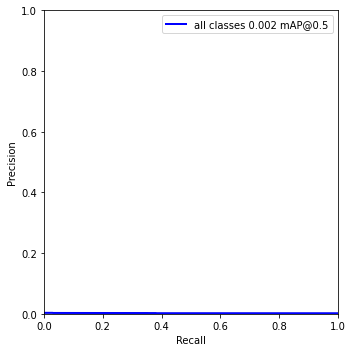

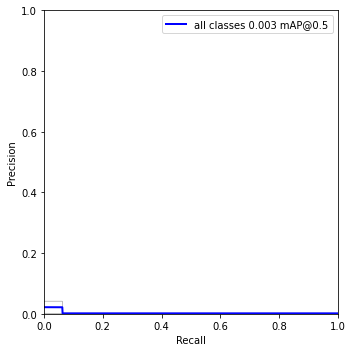

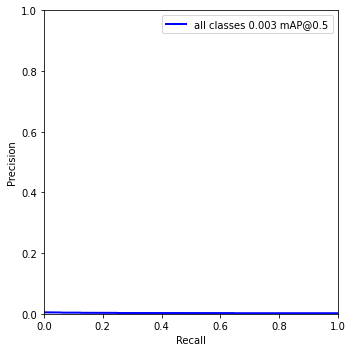

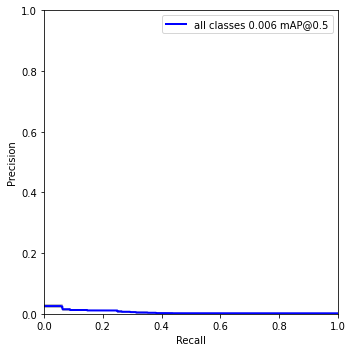

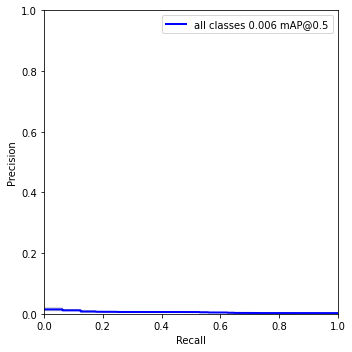

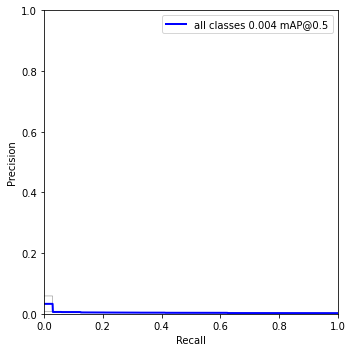

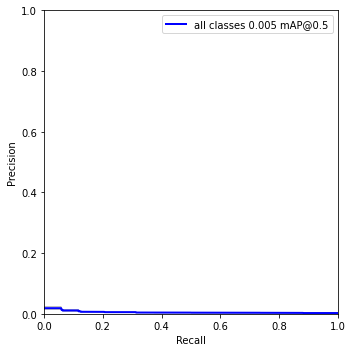

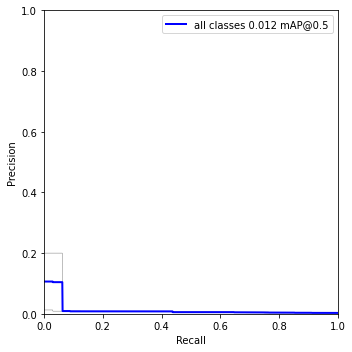

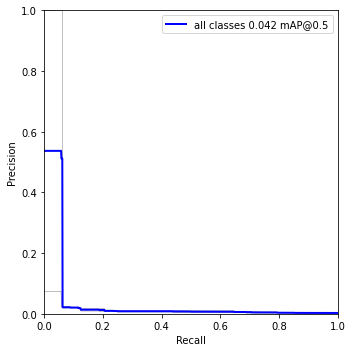

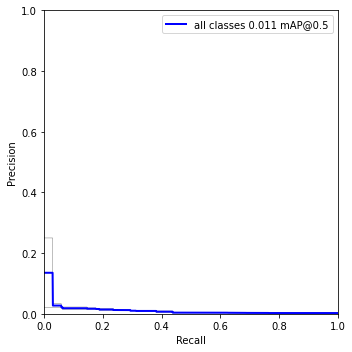

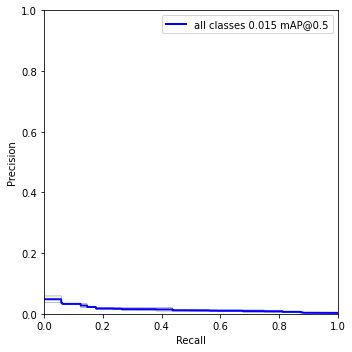

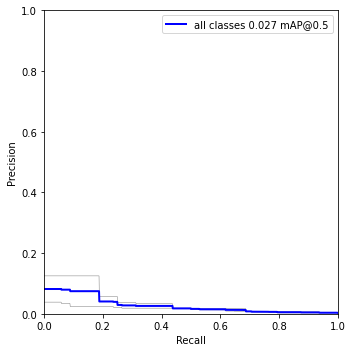

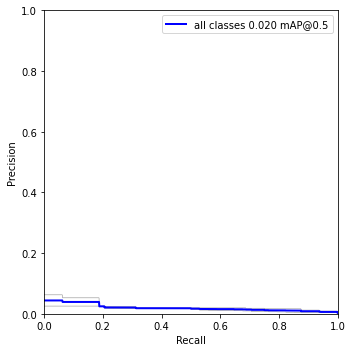

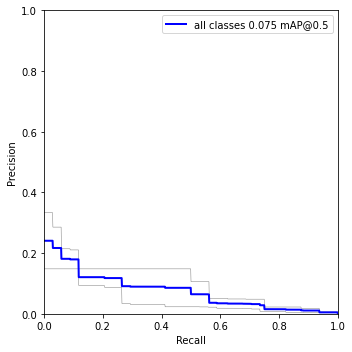

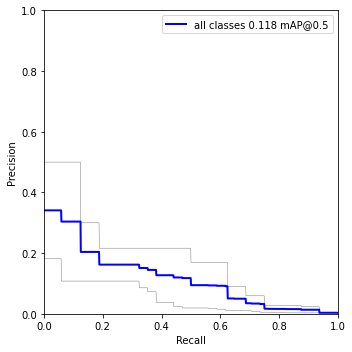

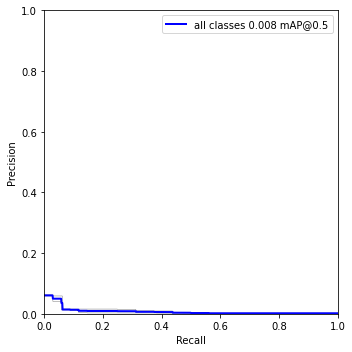

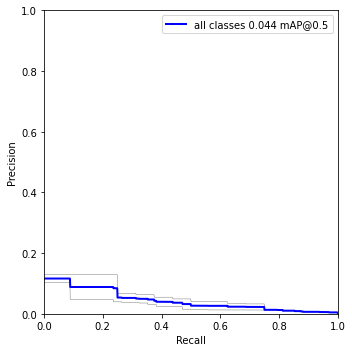

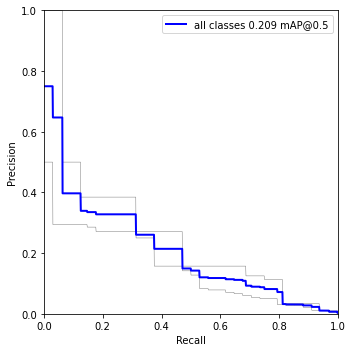

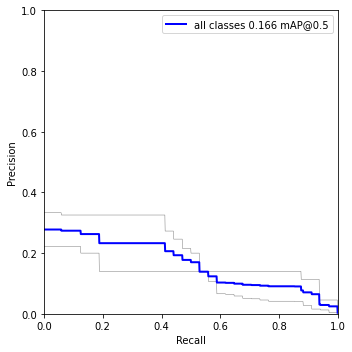

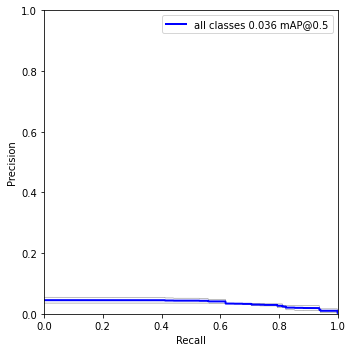

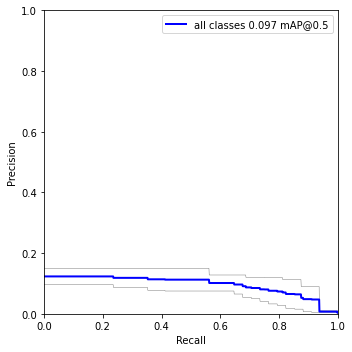

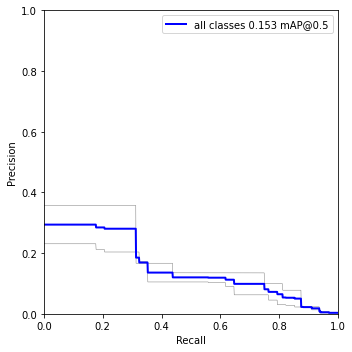

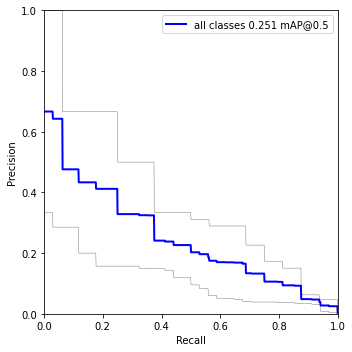

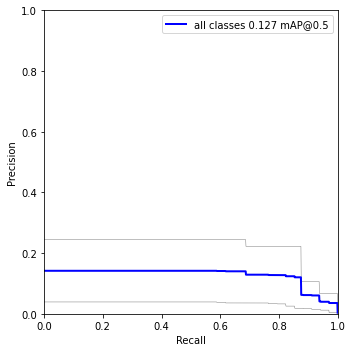

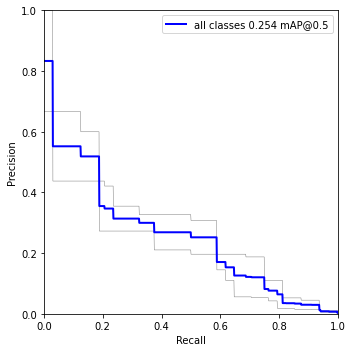

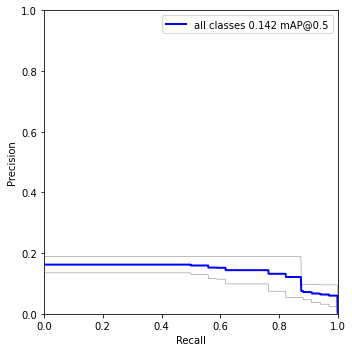

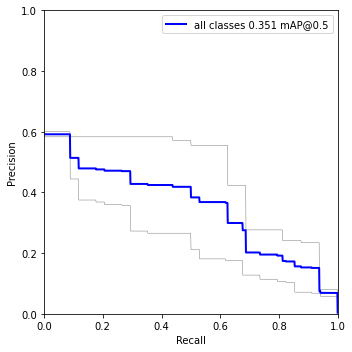

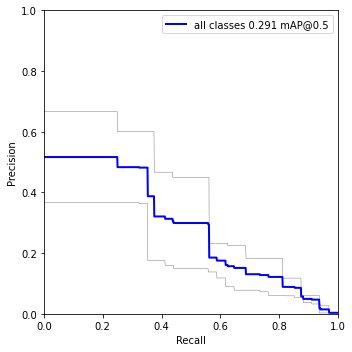

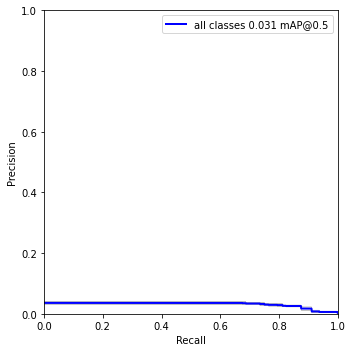

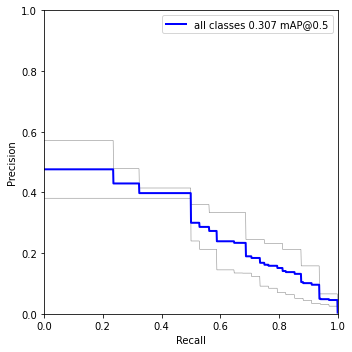

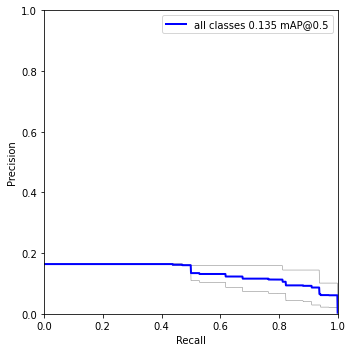

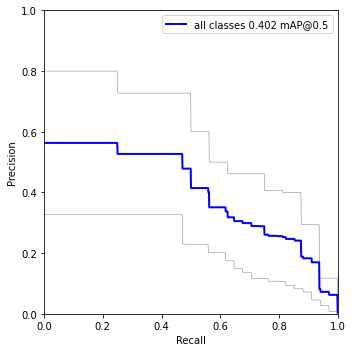

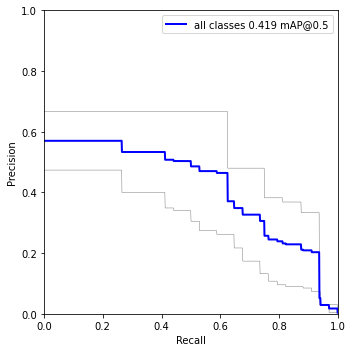

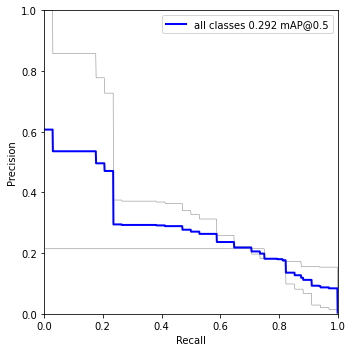

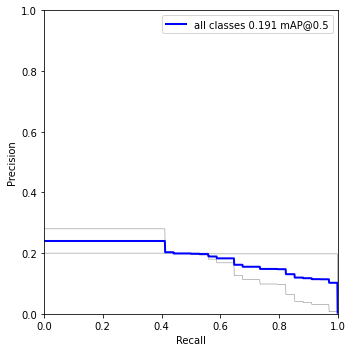

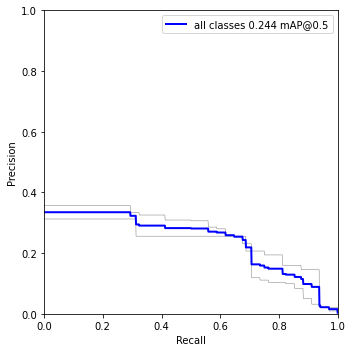

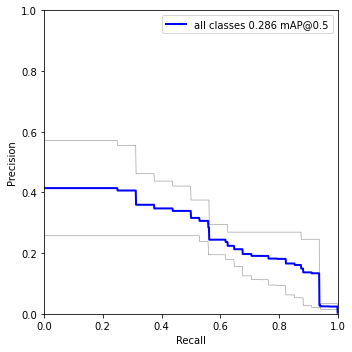

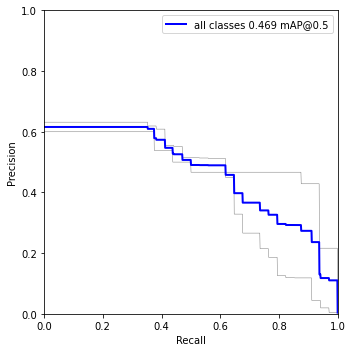

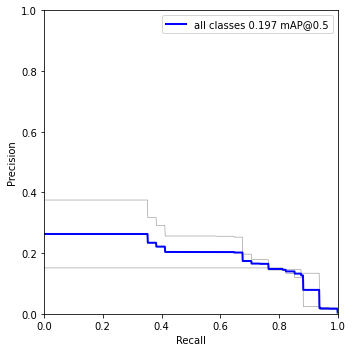

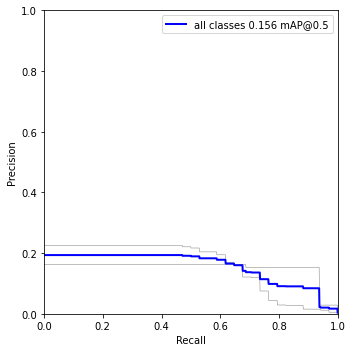

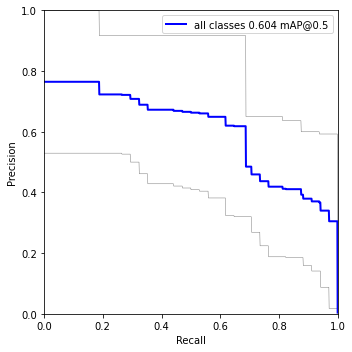

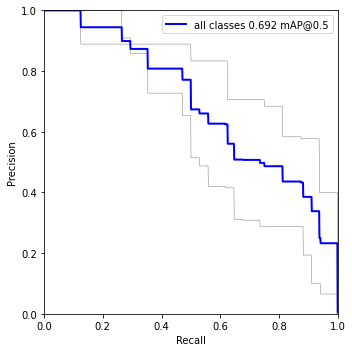

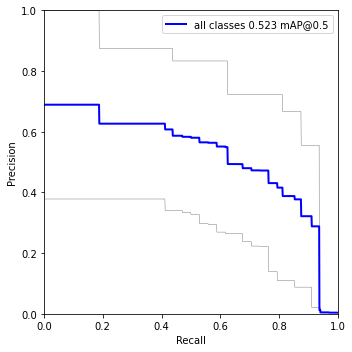

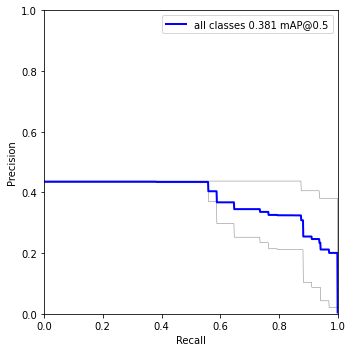

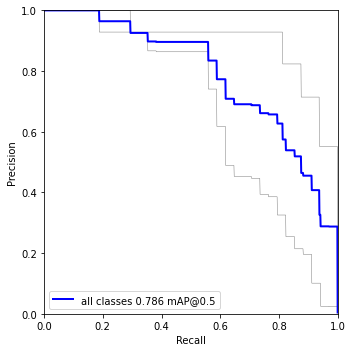

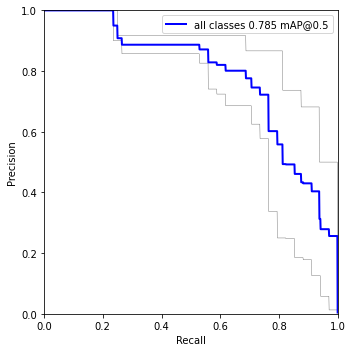

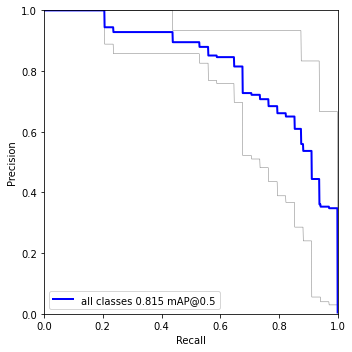

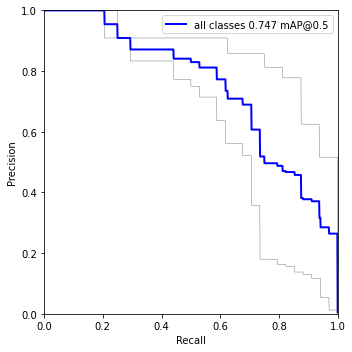

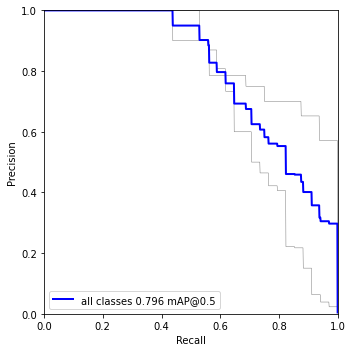

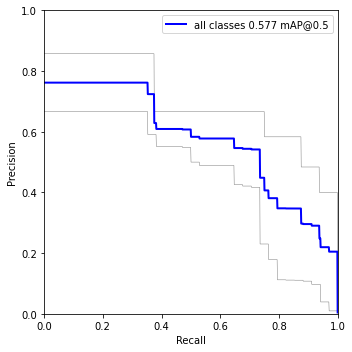

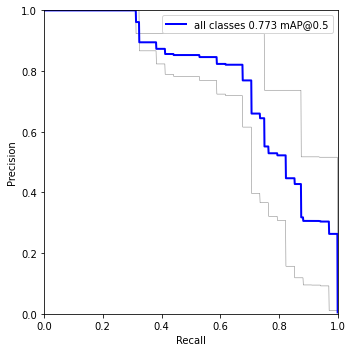

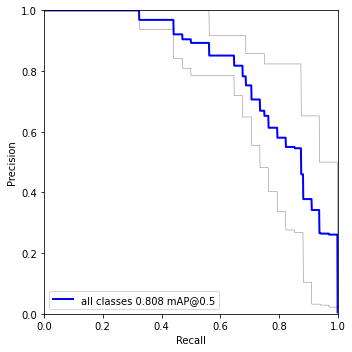

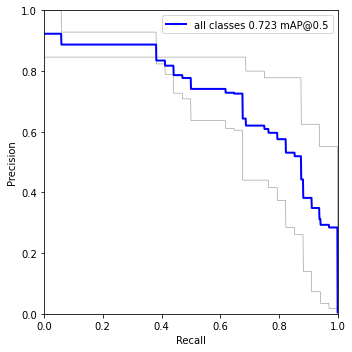

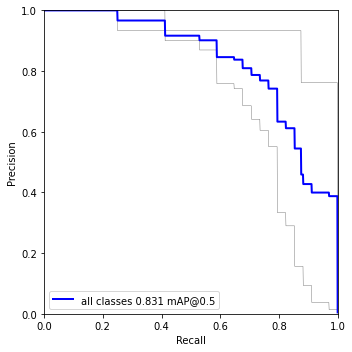

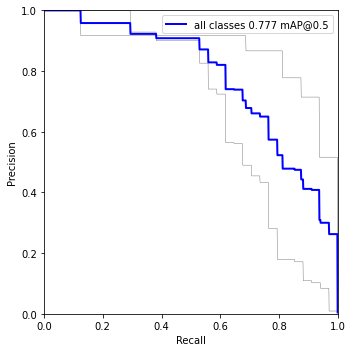

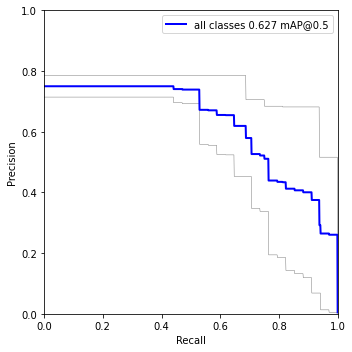

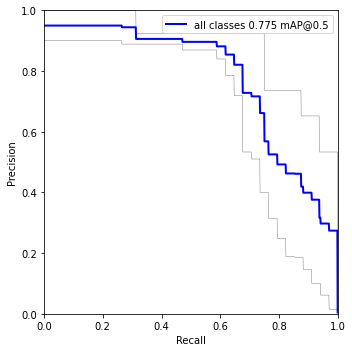

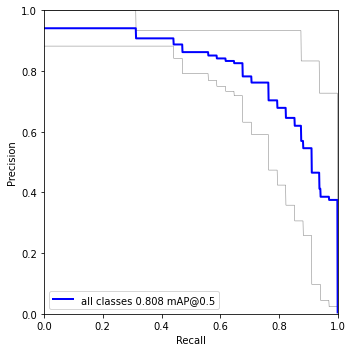

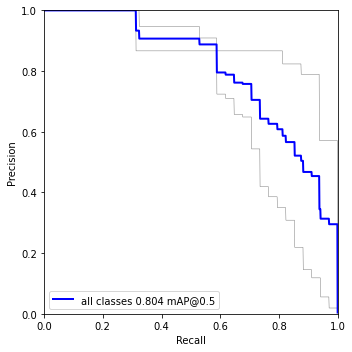

In [ ]:
# Start training
# best_fitnessÊòØ‰ª• [0.0, 0.0, 0.1, 0.9] ÁÇ∫‰øÇÊï∏‰∏¶‰πò‰ª• [precision, recall, mAP@0.5, mAP@0.5:0.95] ÂÜçÊ±ÇÂíåÊâÄÂæó
best_fitness = 0.0
results = (0, 0, 0, 0, 0, 0, 0)  # P, R, mAP@.5, mAP@.5-.95, val_loss(box, obj, cls)

scheduler.step(0)
s = ('%10s' * 5 + '%12s' * 1 + '%10s' * 2) % (
    'epoch', 'memeory', 'box_loss', 'obj_loss', 'cls_loss', 'total_loss', 'targets', 'img_size')
print(s)
for epoch in range(1, epochs+1):  # epoch ------------------------------------------------------------------
    model.train()
    mloss = torch.zeros(4, device=device)  # mean losses
    pbar = enumerate(dataloader)
    pbar = tqdm(pbar, total=nb)  # progress bar
    for i, (imgs, targets, paths, _) in pbar:  # batch -------------------------------------------------------------
        # Ë®àÁÆóËø≠‰ª£ÁöÑÊ¨°Êï∏ iteration
        ni = i + nb * epoch  # number integrated batches (since train start)
        imgs = imgs.to(device, non_blocking=True).float() / 255.0  # uint8 to float32, 0-255 to 0.0-1.0    
        
        # Multi-scale
        sz = random.randrange(imgsz * 0.75, imgsz * 1.25 + gs) // gs * gs  # size
        sf = sz / max(imgs.shape[2:])  # scale factor
        if sf != 1:
            ns = [math.ceil(x * sf / gs) * gs for x in imgs.shape[2:]]  # new shape (stretched to gs-multiple)
            imgs = F.interpolate(imgs, size=ns, mode='bilinear', align_corners=False)

        # Forward
        pred = model(imgs)  # forward
        # Ë®àÁÆóÊêçÂ§±ÔºåÂåÖÊã¨ÂàÜÈ°ûÊêçÂ§±ÔºåobjectnessÊêçÂ§±ÔºåÊ°ÜÁöÑËø¥Ê≠∏ÊêçÂ§±
        # lossÁÇ∫Á∏ΩÊêçÂ§±ÂÄºÔºåloss_itemsÁÇ∫‰∏ÄÂÄãÂÖÉÁµÑÔºåÂåÖÂê´ÂàÜÈ°ûÊêçÂ§±ÔºåobjectnessÊêçÂ§±ÔºåÊ°ÜÁöÑËø¥Ê≠∏ÊêçÂ§±ÂíåÁ∏ΩÊêçÂ§±
        loss, loss_items = compute_loss(pred, targets.to(device), model)  # loss scaled by batch_size

        # Backward
        loss.backward()

        # Optimize
        # Ê®°ÂûãÂèçÂêëÂÇ≥Êí≠ accumulate Ê¨°‰πãÂæåÂÜçÊ†πÊìöÁ¥ØÁ©çÁöÑÊ¢ØÂ∫¶Êõ¥Êñ∞‰∏ÄÊ¨°ÂèÉÊï∏
        if ni % accumulate == 0:
            optimizer.step()  # optimizer.step
            optimizer.zero_grad()
            ema.update(model)

        # Print
        # Âç∞Âá∫ÈÄ≤Ë°åÁöÑËº™Ê¨°, Ë®òÊÜ∂È´î‰ΩîÁî®Èáè, box_loss, obj_loss, cls_loss, total_loss, target ÁöÑÊï∏Èáè, ÂúñÁâáÁöÑ size
        mloss = (mloss * i + loss_items) / (i + 1)  # update mean losses
        mem = '%.3gG' % (torch.cuda.memory_reserved() / 1E9 if torch.cuda.is_available() else 0)  # (GB)
        s = ('%10s' * 2 + '%10.4g' * 3 + '%12.4g' * 1 + '%10.4g' * 2) % (
            '%g/%g' % (epoch, epochs), mem, *mloss, targets.shape[0], imgs.shape[-1])
        pbar.set_description(s)

        # Plot
        # Â∞áÂâç‰∏âÊ¨°Ëø≠‰ª£ batch ÁöÑÊ®ôÁ±§Ê°ÜÂú®ÂúñÁâá‰∏äÁï´Âá∫‰æÜ‰∏¶Ë®òÈåÑÂà∞ wandb ‰∏ä
        if plots and ni < 3:
            f = save_dir / f'train_batch{ni}.jpg'  # filename
            plot_images(images=imgs, targets=targets, paths=paths, fname=f)
        elif plots and ni == 3 and wandb:
            wandb.log({"Mosaics": [wandb.Image(str(x), caption=x.name) for x in save_dir.glob('train*.jpg')]})

        # end batch ------------------------------------------------------------------------------------------------
    # end epoch ----------------------------------------------------------------------------------------------------

    # Scheduler
    # ÈÄ≤Ë°åÂ≠∏ÁøíÁéáË°∞Ê∏õ
    lr = scheduler.get_lr()  # for tensorboard
    scheduler.step()
    ema.update_attr(model)

    # 5 ÂÄã epoch È©óË≠â‰∏ÄÊ¨°È©óË≠âÈõÜÔºå‰∏¶Ë®àÁÆó mAP Á≠âÊåáÊ®ô
    if epoch%5==0:
        results, maps, times = test.test(data,
                                     batch_size=batch_size*2,
                                     imgsz=imgsz_test,
                                     model=ema.ema,
                                     dataloader=testloader,
                                     save_dir=save_dir,
                                     plots=plots,
                                     log_imgs=16)

    # Write
    # Â∞áÊåáÊ®ôÂØ´ÂÖ• result.txt
    with open(results_file, 'a') as f:
        f.write(s + '%10.4g' * 7 % results + '\n')  # P, R, mAP@.5, mAP@.5-.95, val_loss(box, obj, cls)

    # Log
    # Ê∑ªÂä†ÊåáÊ®ôÂà∞ wandb ‰∏≠
    tags = ['train/box_loss', 'train/obj_loss', 'train/cls_loss',  # train loss
            'metrics/precision', 'metrics/recall', 'metrics/mAP_0.5', 'metrics/mAP_0.5:0.95',
            'val/box_loss', 'val/obj_loss', 'val/cls_loss',  # val loss
            'x/lr']  # params
    for x, tag in zip(list(mloss[:-1]) + list(results) + lr, tags):
        wandb.log({tag: x})  # W&B

    # Update best mAP
    fi = fitness(np.array(results).reshape(1, -1))  # weighted combination of [P, R, mAP@.5, mAP@.5-.95]
    if fi > best_fitness:
        best_fitness = fi

    # Save model
    with open(results_file, 'r') as f:  # create checkpoint
        ckpt = {'epoch': epoch,
                'best_fitness': best_fitness,
                'training_results': f.read(),
                'model': ema.ema.state_dict(),
                'optimizer': optimizer.state_dict(),
                'wandb_id': wandb_run.id}

    # Save best model and delete
    if best_fitness == fi:
      torch.save(ckpt, os.path.join(wandb.run.dir, 'best.pt'))
    del ckpt
    # end epoch ----------------------------------------------------------------------------------------------------
# end training

wandb.run.finish()
torch.cuda.empty_cache()

# YOLOv4 Á∞°ÊòìË®ìÁ∑¥ÊïôÂ≠∏

### ÂåØÂÖ•ÊâÄÈúÄÂ•ó‰ª∂

In [ ]:
!pip install wandb pycocotools PyYAML==5.4.1 opencv-python==4.4.0.46 imgaug==0.2.5 -q
!git clone https://github.com/d246810g2000/PyTorch_YOLOv4.git

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1.7 MB 5.5 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 636 kB 42.0 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 49.5 MB 124 kB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 562 kB 27.2 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 144 kB 30.2 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 181 kB 32.5 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 63 kB 820 kB/s 
Cloning into 'PyTorch_YOLOv4'...
remote: Enumerating objects: 807, done.
remote: Counting objects: 100% (159/159), done.
remote: Compressing objects:

In [ ]:
%cd /content/PyTorch_YOLOv4/

/content/PyTorch_YOLOv4


### Ë≥áÊñôÈõÜËΩâÊèõÊ†ºÂºè

In [ ]:
!unzip -q datasets/datasets.zip -d datasets/
!python convert_voc_to_yolo.py

### ÂâµÂª∫ yaml Âíå cfg Ê™î

In [ ]:
!echo -e 'train: datasets/pet/train/images\nval: datasets/pet/valid/images\n\nnc: 2\nnames: [cat, dog]' > data/pet.yaml
!head data/pet.yaml

train: datasets/pet/train/images
val: datasets/pet/valid/images

nc: 2
names: [cat, dog]


In [ ]:
!cp cfg/yolov4.cfg cfg/yolov4-pet.cfg
!sed -n -e 959p -e 966p -e 1046p -e 1053p -e 1133p -e 1140p cfg/yolov4-pet.cfg

filters=255
classes=80
filters=255
classes=80
filters=255
classes=80


In [ ]:
!sed -i '959s/255/21/' cfg/yolov4-pet.cfg # (classes + 5)x3
!sed -i '966s/80/2/' cfg/yolov4-pet.cfg
!sed -i '1046s/255/21/' cfg/yolov4-pet.cfg # (classes + 5)x3
!sed -i '1053s/80/2/' cfg/yolov4-pet.cfg
!sed -i '1133s/255/21/' cfg/yolov4-pet.cfg # (classes + 5)x3
!sed -i '1140s/80/2/' cfg/yolov4-pet.cfg

In [ ]:
!sed -n -e 959p -e 966p -e 1046p -e 1053p -e 1133p -e 1140p cfg/yolov4-pet.cfg

filters=21
classes=2
filters=21
classes=2
filters=21
classes=2


### ‰ΩøÁî® wandb Ë®òÈåÑË®ìÁ∑¥ÈÅéÁ®ã
- ÂÖàÈÄ≤ÂÖ•ÂÆòÁ∂≤ÁôªÂÖ•Ôºöhttps://wandb.ai/site 
- Âè≥‰∏äÊñπÈ†≠ÂÉè -> settings -> Ë§áË£Ω API keys -> Â°´ÂÖ•‰∏ãÊñπËº∏ÂÖ•Ëôï

In [ ]:
import wandb
# Logging
id = wandb.util.generate_id()
wandb_run = wandb.init()

<IPython.core.display.Javascript object>

wandb: You can find your API key in your browser here: https://wandb.ai/authorize


wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: ¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


### ÈñãÂßãË®ìÁ∑¥

In [ ]:
# command line training
!python train.py --device 0 --batch-size 4 --img-size 416 --data data/pet.yaml --cfg cfg/yolov4-pet.cfg --weights '' --name '$id' --epochs 300 --multi-scale

Using torch 1.10.0+cu111 CUDA:0 (Tesla T4, 15109MB)

Namespace(adam=False, batch_size=4, bucket='', cache_images=False, cfg='cfg/yolov4-pet.cfg', data='data/pet.yaml', device='0', epochs=300, evolve=False, exist_ok=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[416, 416], local_rank=-1, log_imgs=16, multi_scale=True, name='2pstmt6k', noautoanchor=False, nosave=False, notest=False, project='runs/train', rect=False, resume=False, save_dir='runs/train/2pstmt6k', single_cls=False, sync_bn=False, total_batch_size=4, weights='', workers=8, world_size=1)
Start Tensorboard with "tensorboard --logdir runs/train", view at http://localhost:6006/
Hyperparameters {'lr0': 0.01, 'lrf': 0.1, 'momentum': 0.937, 'weight_decay': 0.0005, 'warmup_epochs': 3.0, 'warmup_momentum': 0.8, 'warmup_bias_lr': 0.1, 'box': 0.05, 'cls': 0.3, 'cls_pw': 1.0, 'obj': 0.6, 'obj_pw': 1.0, 'iou_t': 0.2, 'anchor_t': 4.0, 'fl_gamma': 0.0, 'hsv_h': 0.015, 'hsv_s': 0.7, 'hsv_v': 0.4, 'degrees